# Background / Latar Belakang

Perusahaan ini bergerak di bidang real estate dan saat ini, berfokus pada meningkatkan strategi pemasaran dan penjualan properti di California. Dalam upaya meningkatkan efisiensi operasional dan meningkatkan pendapatan, perusahaan ini menghadapi tantangan utama dalam menentukan harga yang optimal untuk properti-propertinya. 

Dalam beberapa tahun terakhir, pasar real estate California telah mengalami dinamika yang signifikan, dengan fluktuasi harga yang cepat dan kompleks. Data dari California Association of Realtors menunjukkan bahwa harga rata-rata properti di California meningkat sebesar 12,5% dalam tahun 2022, namun juga menunjukkan bahwa penjualan properti telah menurun sebesar 8,1% dalam periode yang sama. Hal ini menunjukkan bahwa pasar real estate California sangat dinamis dan memerlukan strategi pemasaran yang tepat untuk mengoptimalkan pendapatan dan meminimalkan risiko kerugian. Karena pasar real estate California yang dinamis dan kompleks, penentuan harga yang tepat sangat penting untuk mengoptimalkan pendapatan dan meminimalkan risiko kerugian.

# Problem Statement

Pasar real estate yang dinamis dipengaruhi oleh berbagai faktor seperti lokasi, ukuran properti, total kamar, dan banyak lagi. Oleh karena itu, perusahaan menghadapi kesulitan dalam menetapkan harga yang tepat secara konsisten, yang dapat mengakibatkan potensi kehilangan pendapatan atau kesulitan dalam menarik calon pembeli atau penyewa.

Untuk mengatasi tantangan ini, kami bermaksud untuk mengembangkan model machine learning yang dapat memprediksi harga rumah di California berdasarkan berbagai faktor yang relevan. Model ini diharapkan dapat memberikan perkiraan harga yang lebih akurat dan dapat diandalkan, membantu kami membuat keputusan yang lebih informasional dalam menetapkan harga properti, serta memahami tren pasar yang mendasarinya dengan lebih baik.

# Goal/Tujuan

Dikarenakan problem statemnet yang ada, Goal dari analisis ini adalah dengan menjawab pertanyaan:
- Bagaimana penerapan model prediksi dapat membantu perusahaan meningkatkan kinerja bisnisnya dengan memberikan perkiraan harga yang lebih akurat untuk properti di California dan meningkatkan daya saing di pasar real estate?

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

**Data Understanding** merupakan tahap **pengenalan dataset**. Dari tahap ini, kita dapat mengidentifikasi berbagai anomali yang ada dalam dataset kita yang perlu diperbaiki selama proses data cleaning. Setiap tindakan yang diambil untuk menangani anomali akan didukung oleh penjelasan yang memadai, baik berdasarkan pengetahuan domain maupun analisis statistik.

Data Overall

In [3]:
# Melihat keseluruhan data
import pandas as pd
df_raw = pd.read_csv('data_california_house.csv')
df_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0



Data tersebut berkaitan dengan rumah-rumah yang ditemukan di suatu distrik di California dan beberapa statistik ringkasan berdasarkan data sensus tahun 1990. Diingatkan bahwa data tersebut belum dibersihkan, jadi beberapa langkah pra-pemrosesan diperlukan! Kolom-kolomnya adalah sebagai berikut, dan namanya cukup jelas:
1.  **longitude**: Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke barat
2.  **latitude**: Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke utara
3.  **Housing median age**: Usia median rumah dalam satu blok; angka yang lebih rendah menunjukkan bangunan yang lebih baru
4.  **total_rooms**: Jumlah total kamar dalam satu blok
5.  **total_bedrooms**: Jumlah total kamar tidur dalam satu blok
6.  **population**: Jumlah total orang yang tinggal dalam satu blok
7.  **households**: Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, dalam satu blok
8.  **median_income**: Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)
9.  **median house value**: Nilai median rumah untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)
10.  **ocean_proximity**: Lokasi rumah terkait dengan laut/samudra 


## Data Types

In [4]:
# Melihat tipe data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Terdapat 10 kolom dengan semua tipe float kecuali ocean_proximity berupa objek

## Missing Values

In [5]:
print (f'Total Missing Values \n{df_raw.isna().sum().sort_values(ascending = False)}')

Total Missing Values 
total_bedrooms        137
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


**Terdapat missing values pada data total_bedrooms sebanyak 137.** 

<Axes: >

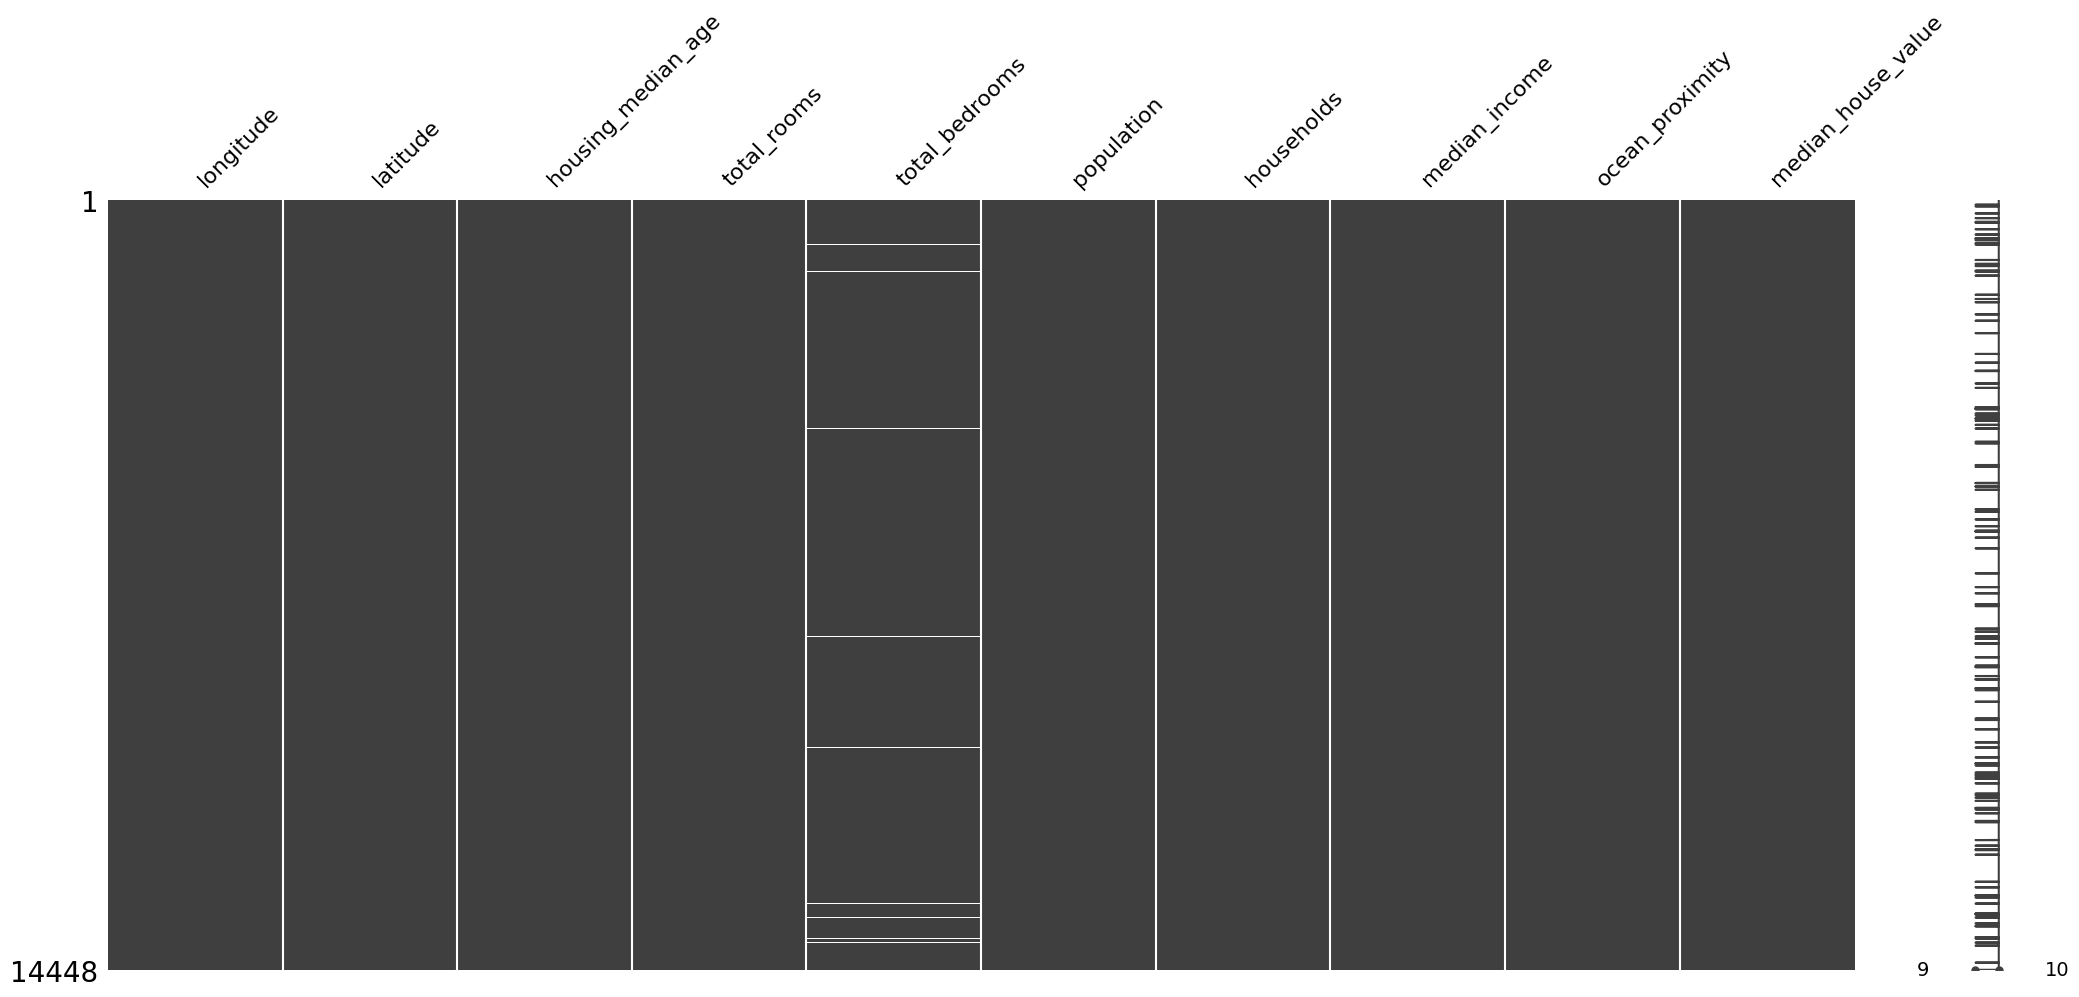

In [6]:
import missingno
missingno.matrix(df_raw)

**Terlihat terdapat missing values pada data total_bedrooms**

## Data Unique

In [7]:
pd.set_option('display.max_colwidth',1000)
# data unik di tiap kolom
listItem = []
for col in df_raw.columns :
    listItem.append( [col, df_raw[col].nunique(), sorted(df_raw[col].unique())])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-124.35, -124.3, -124.27, -124.26, -124.23, -124.22, -124.21, -124.19, -124.18, -124.17, -124.16, -124.15, -124.14, -124.13, -124.11, -124.1, -124.09, -124.08, -124.07, -124.06, -124.05, -124.02, -124.01, -124.0, -123.98, -123.96, -123.92, -123.91, -123.88, -123.85, -123.84, -123.83, -123.82, -123.81, -123.8, -123.79, -123.76, -123.74, -123.73, -123.72, -123.71, -123.7, -123.69, -123.68, -123.64, -123.59, -123.54, -123.53, -123.52, -123.5, -123.48, -123.47, -123.43, -123.41, -123.38, -123.37, -123.36, -123.35, -123.34, -123.32, -123.28, -123.26, -123.23, -123.22, -123.21, -123.2, -123.19, -123.18, -123.17, -123.16, -123.15, -123.11, -123.1, -123.08, -123.07, -123.04, -123.03, -123.02, -123.01, -123.0, -122.99, -122.98, -122.97, -122.96, -122.95, -122.94, -122.93, -122.92, -122.91, -122.9, -122.89, -122.88, -122.87, -122.86, -122.85, -122.84, -122.83, -122.82, -122.81, -122.8, ...]"
1,latitude,836,"[32.54, 32.55, 32.56, 32.57, 32.58, 32.59, 32.6, 32.61, 32.62, 32.63, 32.64, 32.65, 32.66, 32.67, 32.68, 32.69, 32.7, 32.71, 32.72, 32.73, 32.74, 32.75, 32.76, 32.77, 32.78, 32.79, 32.8, 32.81, 32.82, 32.83, 32.84, 32.85, 32.86, 32.87, 32.88, 32.89, 32.9, 32.91, 32.92, 32.93, 32.94, 32.95, 32.96, 32.97, 32.98, 32.99, 33.0, 33.01, 33.02, 33.03, 33.04, 33.05, 33.06, 33.07, 33.08, 33.09, 33.1, 33.11, 33.12, 33.13, 33.14, 33.15, 33.16, 33.17, 33.18, 33.19, 33.2, 33.21, 33.22, 33.23, 33.24, 33.25, 33.26, 33.27, 33.28, 33.29, 33.31, 33.32, 33.33, 33.34, 33.35, 33.36, 33.37, 33.38, 33.39, 33.4, 33.41, 33.42, 33.43, 33.44, 33.45, 33.46, 33.47, 33.48, 33.49, 33.5, 33.51, 33.52, 33.53, 33.54, ...]"
2,housing_median_age,52,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]"
3,total_rooms,5227,"[2.0, 6.0, 8.0, 11.0, 12.0, 15.0, 16.0, 18.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 32.0, 36.0, 37.0, 40.0, 41.0, 44.0, 45.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 58.0, 59.0, 60.0, 63.0, 64.0, 66.0, 69.0, 70.0, 72.0, 78.0, 80.0, 81.0, 83.0, 84.0, 88.0, 90.0, 91.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 114.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 123.0, 125.0, 126.0, 127.0, 131.0, 133.0, 135.0, 136.0, 137.0, 138.0, 140.0, 141.0, 142.0, 143.0, 144.0, 146.0, 148.0, 149.0, 151.0, 152.0, 156.0, 157.0, 158.0, 161.0, 164.0, 166.0, 167.0, 170.0, 172.0, ...]"
4,total_bedrooms,1748,"[1.0, 5.0, 7.0, 9.0, 11.0, 17.0, 18.0, 21.0, 26.0, 28.0, 29.0, 32.0, 33.0, 35.0, 37.0, 40.0, 41.0, 44.0, 47.0, 49.0, 50.0, 54.0, 59.0, 68.0, 69.0, 72.0, 76.0, 78.0, 79.0, 82.0, 85.0, 86.0, 87.0, 88.0, 90.0, 91.0, 93.0, 94.0, 95.0, 96.0, 100.0, 105.0, 107.0, 108.0, 109.0, 110.0, 112.0, 114.0, 116.0, 117.0, 119.0, 123.0, 124.0, 126.0, 127.0, 131.0, 133.0, 134.0, 135.0, 139.0, 140.0, 142.0, 143.0, 144.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 172.0, 173.0, 174.0, 175.0, 176.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 187.0, 188.0, 189.0, ...]"
5,population,3498,"[3.0, 5.0, 6.0, 8.0, 9.0, 11.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 36.0, 37.0, 39.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 71.0, 72.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 106.0, 107.0, 108.0, 112.0, 113.0, 114.0, 115.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 124.0, 125.0, ...]"
6

Dari unique sample data diatas, dapat diambil informasi bahwa:

- Tidak ada kesalahan penulisan data. Terlihat dari kemiripan penulisan data. (sebagai contoh, koma pada profit konsisten menggunakan titik ( . ) )
- Data berupa objek hanya di kolom ocean_proximity, yang lain merupakan float

## Numerik

In [8]:
numerik = df_raw.select_dtypes(include='number')

### Statistika Deskriptif

In [9]:
df_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Dari data diatas, dapat dilihat bahwa: 
- Data ini memiliki 14448 Baris Data
- Jika dilihat dari Mean dan Mediannya (50%), mean median_house_value > median median_house_value,maka kemungkinan lebih besar distribusi memiliki ekor yang panjang di sisi kanan (right skewed).
- Data median_income dan median_house_value  termasuk kedalam data kontinu, sedangkan housing_median_age, total_rooms, total_bedrooms, population dan household masuk ke dalam data diskrit.

### Distribusi Data

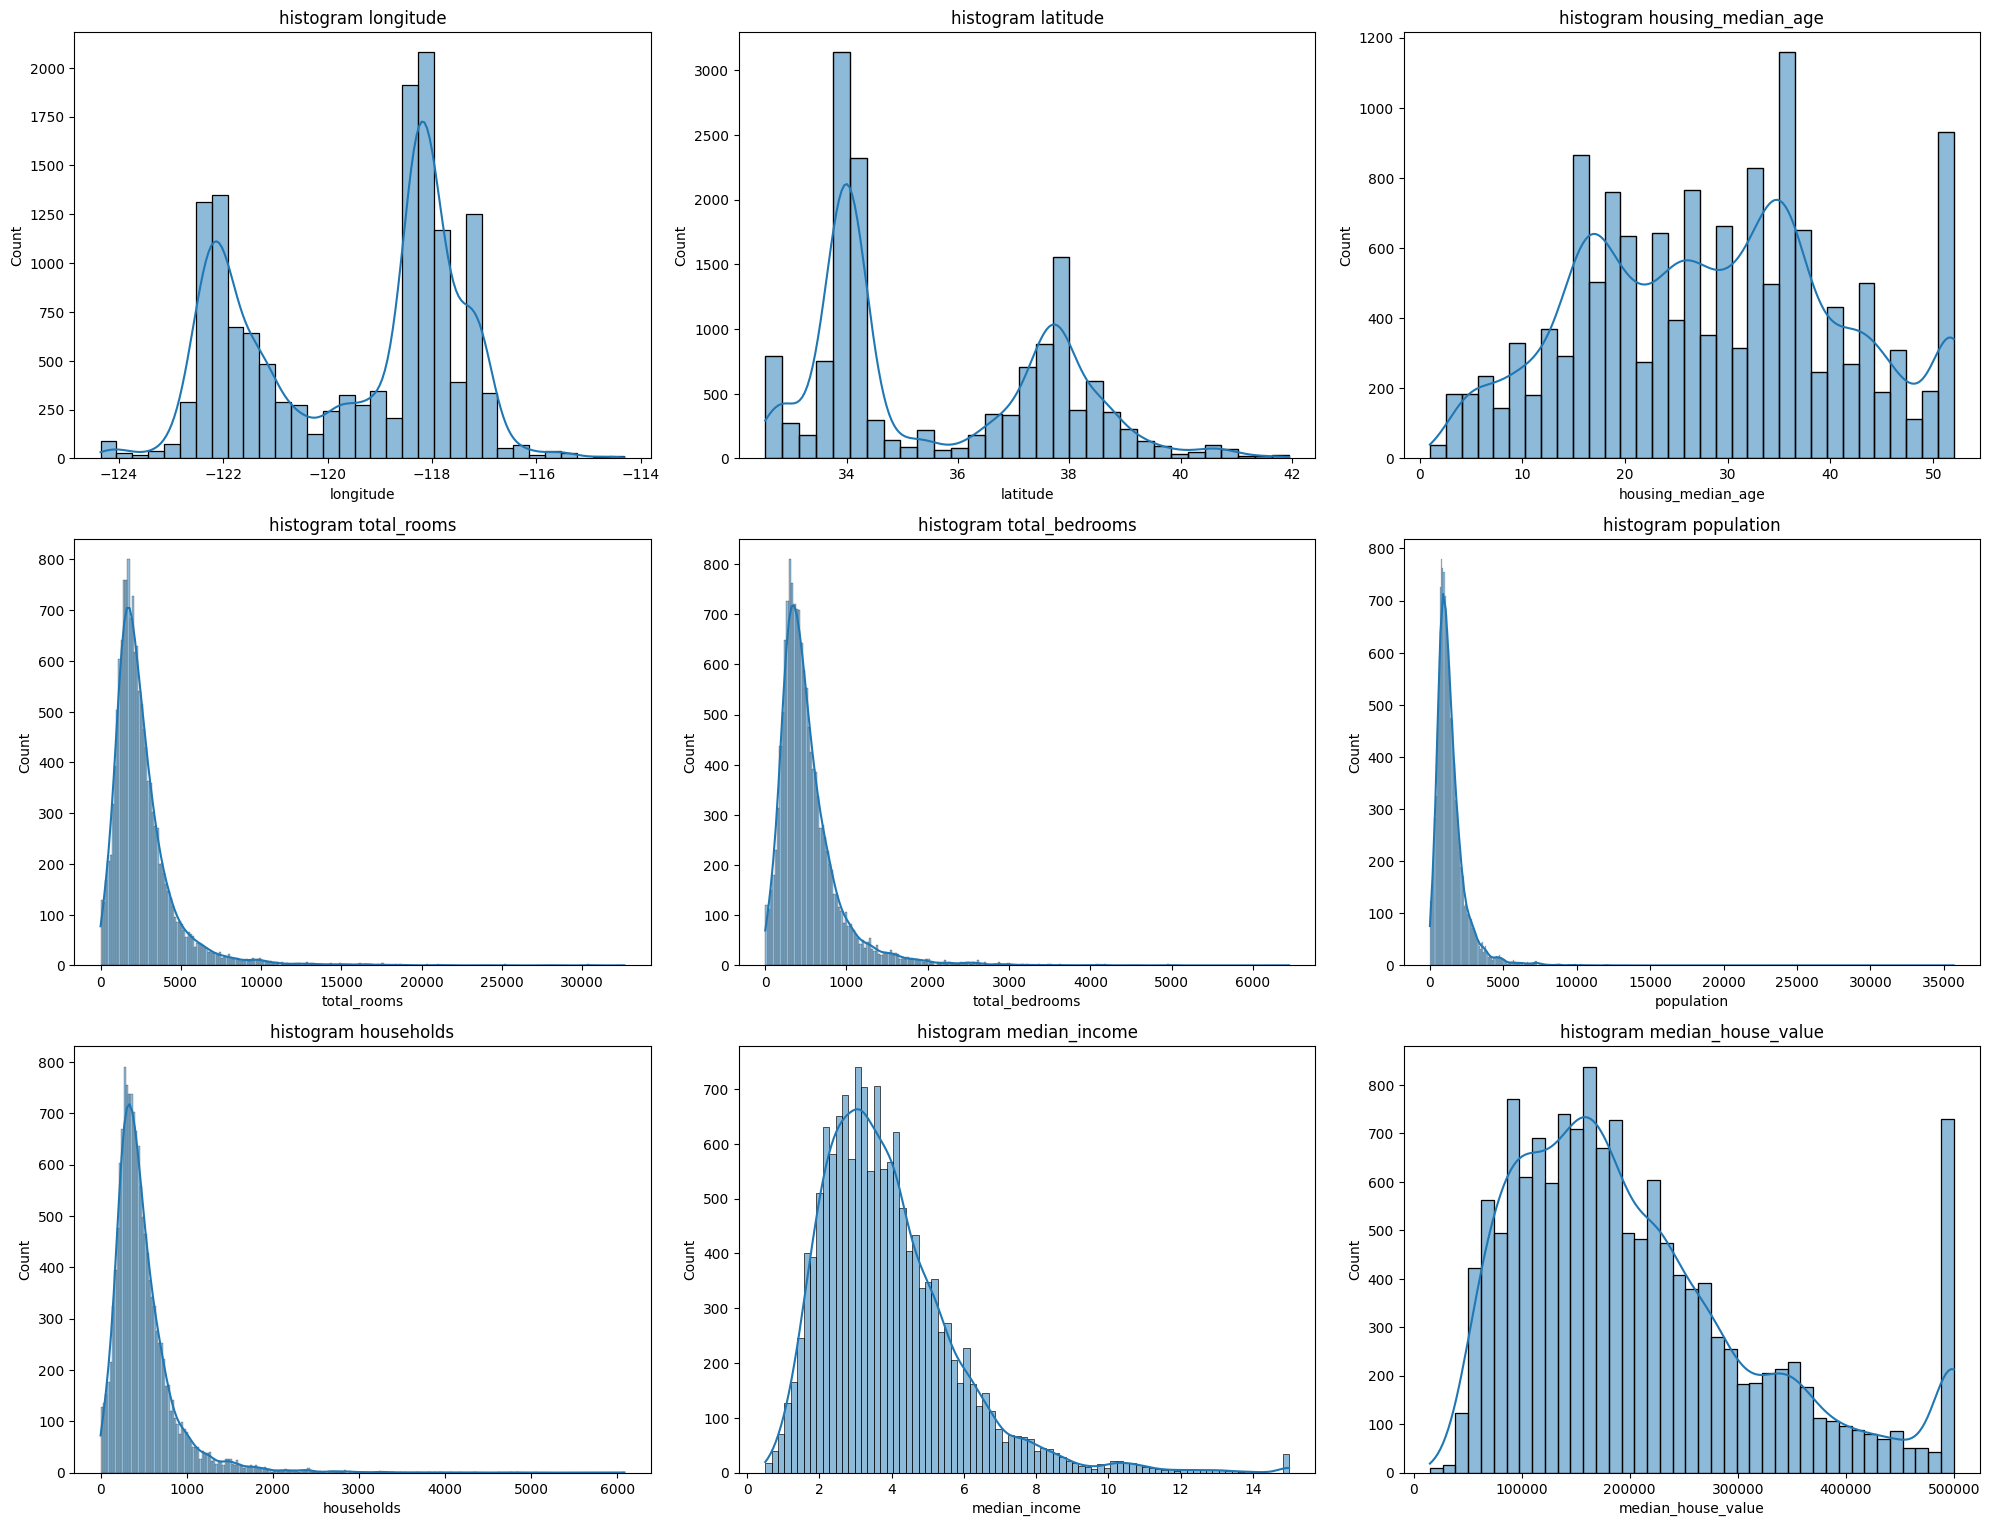

In [10]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,3,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

Dari diagram diatas, dapat diambil informasi bahwa:
- data total_rooms, total_bedrooms, population, household, median_income dan median house value memiliki distribusi right skewed
- angka tertinggi pada housing_median_age memiliki quantity terbesar sekitar angka 38.
- fitur fitur pada data ini berdistribusi tidak normal. hal ini dapat mempengaruhi performa dan interpretasi model machine learning. maka dari itu, akan ada langkah langkah untuk penanganan outliers dan pengubahan skala.

### Outliers

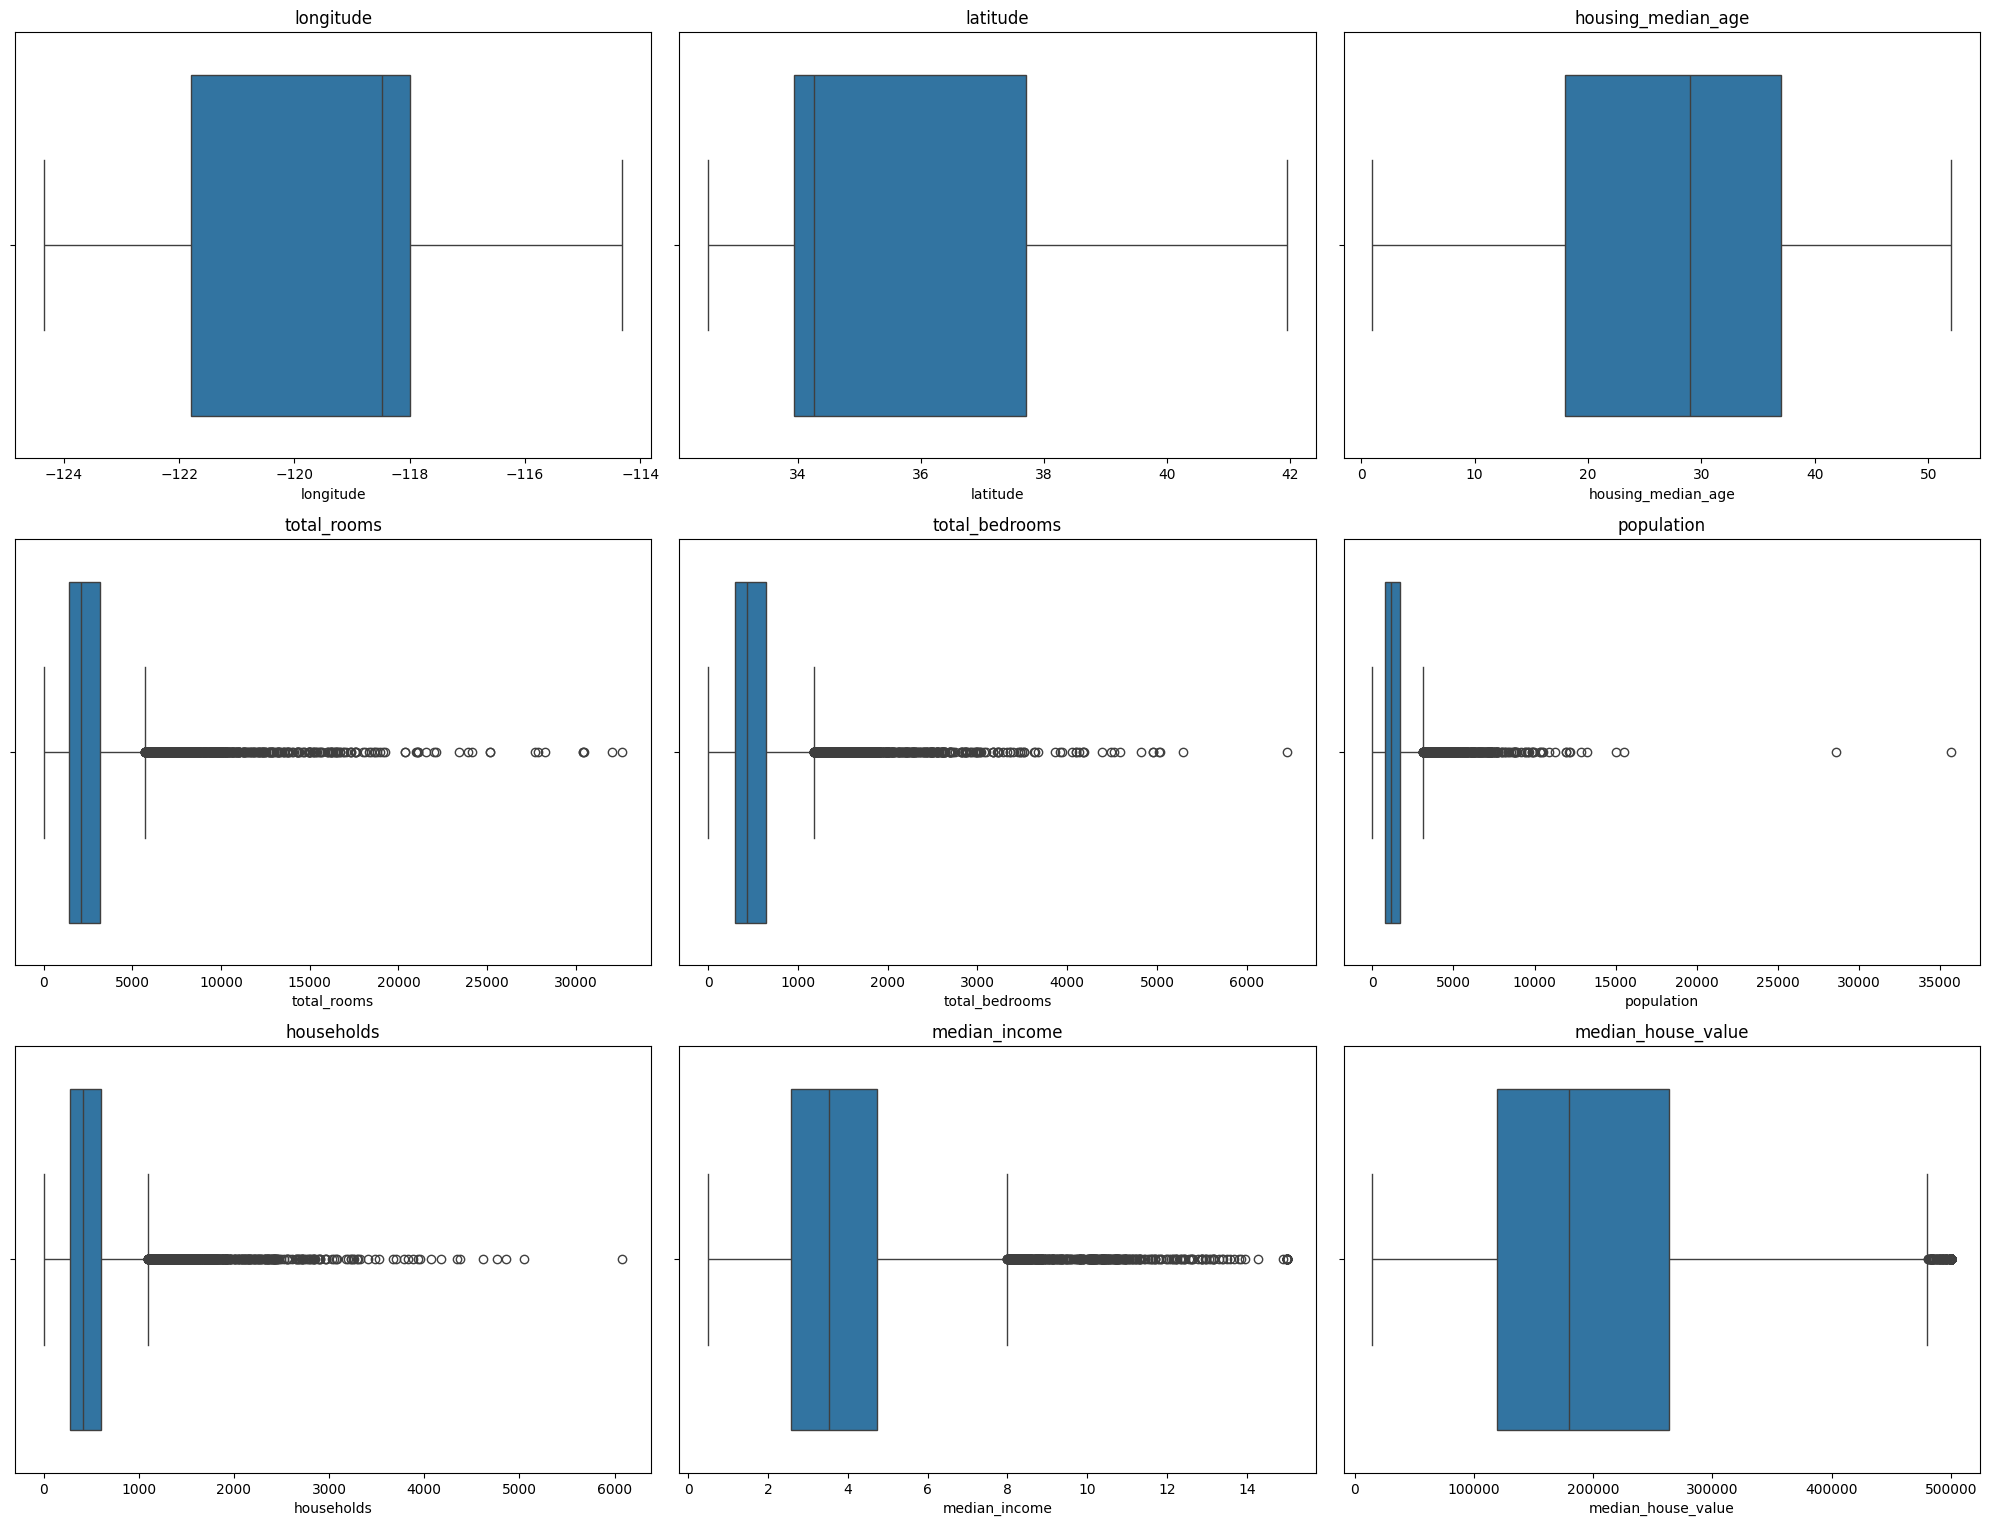

In [11]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,3,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [12]:
for kolom in numerik.columns:
    q1 = df_raw[kolom].describe().loc['25%']
    q3 = df_raw[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df_raw[(df_raw[kolom] < lower_bound) | (df_raw[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data longitude memiliki outliers 0
data latitude memiliki outliers 0
data housing_median_age memiliki outliers 0
data total_rooms memiliki outliers 900
data total_bedrooms memiliki outliers 879
data population memiliki outliers 827
data households memiliki outliers 842
data median_income memiliki outliers 482
data median_house_value memiliki outliers 757


Dari data diatas, didapatkan informasi yaitu:

- terdapat 900 outliers pada total_rooms, 879 outliers pada total_bedrooms, 827 outliers pada population, 842 pada households, 482 pada median_income dan 757 pada median_house_value
- kolom longitude dan latitude tidak memiliki outliers

tindakan selanjutnya akan dilakukan pada data cleaning

## Kategorik

In [13]:
kategorik = df_raw.select_dtypes(exclude='number')

In [14]:
kategorik

,ocean_proximity
0,INLAND
1,NEAR BAY
2,<1H OCEAN
3,<1H OCEAN
4,INLAND
...,...
14443,INLAND
14444,INLAND
14445,NEAR OCEAN
14446,<1H OCEAN


### Count Values

In [15]:
kategorik.nunique()

ocean_proximity    5
dtype: int64

Terdapat 5 nunique dalam kolom ocean_proximity

### Modus

In [16]:
kategorik.describe(include='object')

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


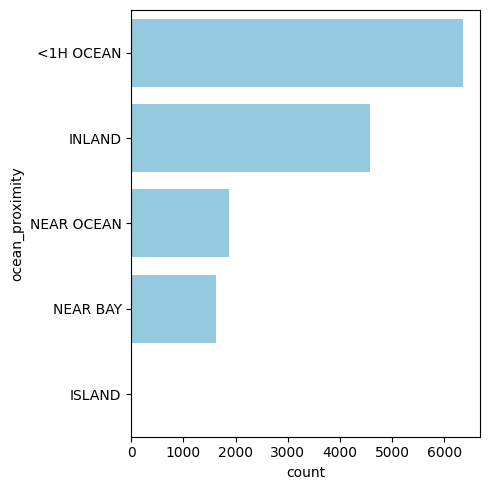

In [17]:
count = 0
fig = plt.figure(figsize=(5,5))
for kolom in kategorik.columns:
    count += 1
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

In [18]:
kategorik.value_counts()

ocean_proximity
<1H OCEAN          6369
INLAND             4576
NEAR OCEAN         1879
NEAR BAY           1622
ISLAND                2
Name: count, dtype: int64

Dari informasi diatas, dapat diambil informasi bahwa:
- <1H Ocean memiliki data paling banyak dengan angka 6369
- Data island hanya memiliki 2 data

# Exploratory Data Analysis

## Distribusi Populasi dan harga rumah

<Axes: xlabel='longitude', ylabel='latitude'>

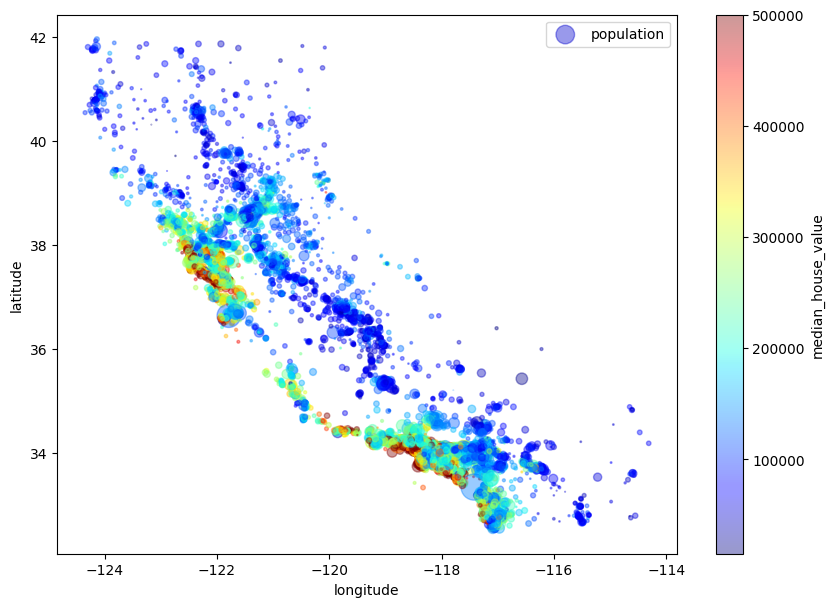

In [19]:
# opsi s: radius setiap lingkaran mewakili populasi/100
# opsi c: warna mewakili harga median
df_raw.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df_raw['population']/100, label='population', figsize=(10,7), 
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

Berikut merupakan scatter plot mengenai distribusi populasi dan harga rumah di lokasi pada california.

Bagian kiri bawah dari peta california merupakan daerah yang dekat dengan laut, sedangkan bagian kanan atas berdekatan dengan daerah lain (Nevada dan Las Vegas). Dapat dilihat dari visualisasi diatas bagwa harga rumah yang mendekati laut harganya cenderung lebih mahal dibandingkan wilayah yang jauh dari laut

## Korelasi

In [20]:
numerik.corr(method='spearman') # ketika tidak normal, kalau normal = pearson

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


<Axes: >

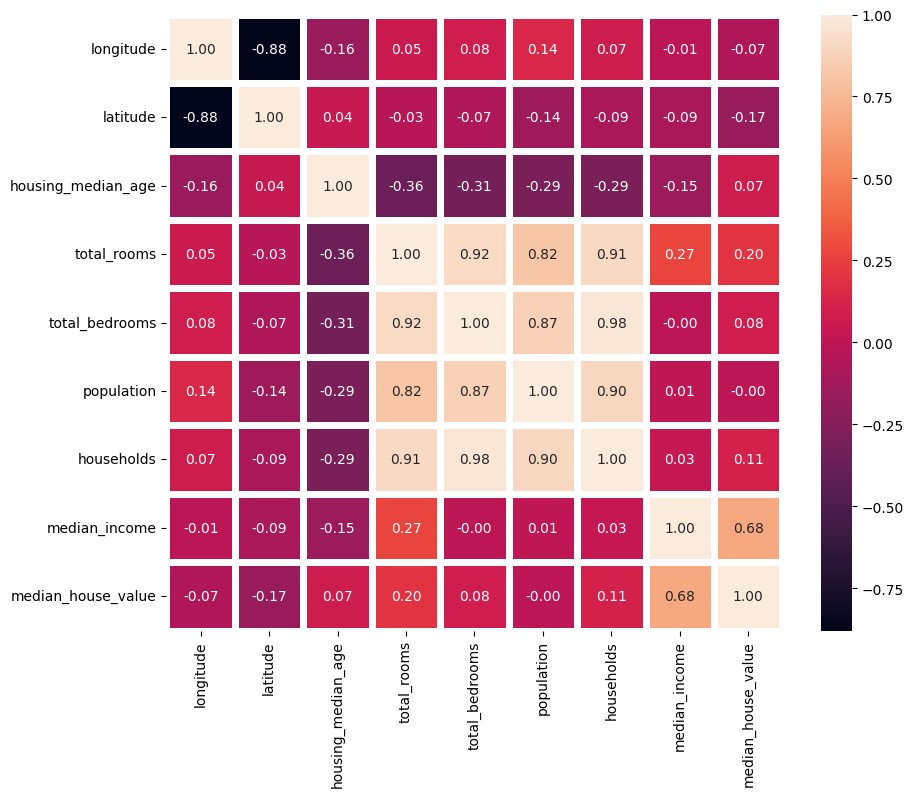

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(numerik.corr('spearman'),annot=True,square=True,linewidths=5,fmt='.2f')

Dari visualisasi di atas, didapatkan informasi sebagai berikut:
- Korelasi dengan hubungan positif tertinggi dimiliki oleh household dan total_bedrooms dengan nilai 0.98
- Korelasi dengan hubungan positif tertinggi kedua dimiliki oleh total_rooms dan total_bedrooms dengan nilai 0.92
- Kedua hal diatas menunjukkan bahwa semakin tinggi salah satunya, maka akan berdampak positif (naik) pula terhadap satu data lainnya
- housing_median_age dan total_rooms memiliki hubungan negatif dengan nilai -0.36, hal ini menunjukkan semakin besar housing_median_age akan semakin kecil total_rooms yang didapatkan (diluar longitude dan latitude).

# Data Cleaning

In [22]:
df_prep = df_raw.copy() # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning

Melakukan pengcopyan data agar mempermudah pada saat melakukan data cleaning.

## Handling Missing Values

In [23]:
# cek data yang missing values

df_prep[df_prep.isna().any(axis = 1)] # menunjukkan semua data yang missing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


<Axes: >

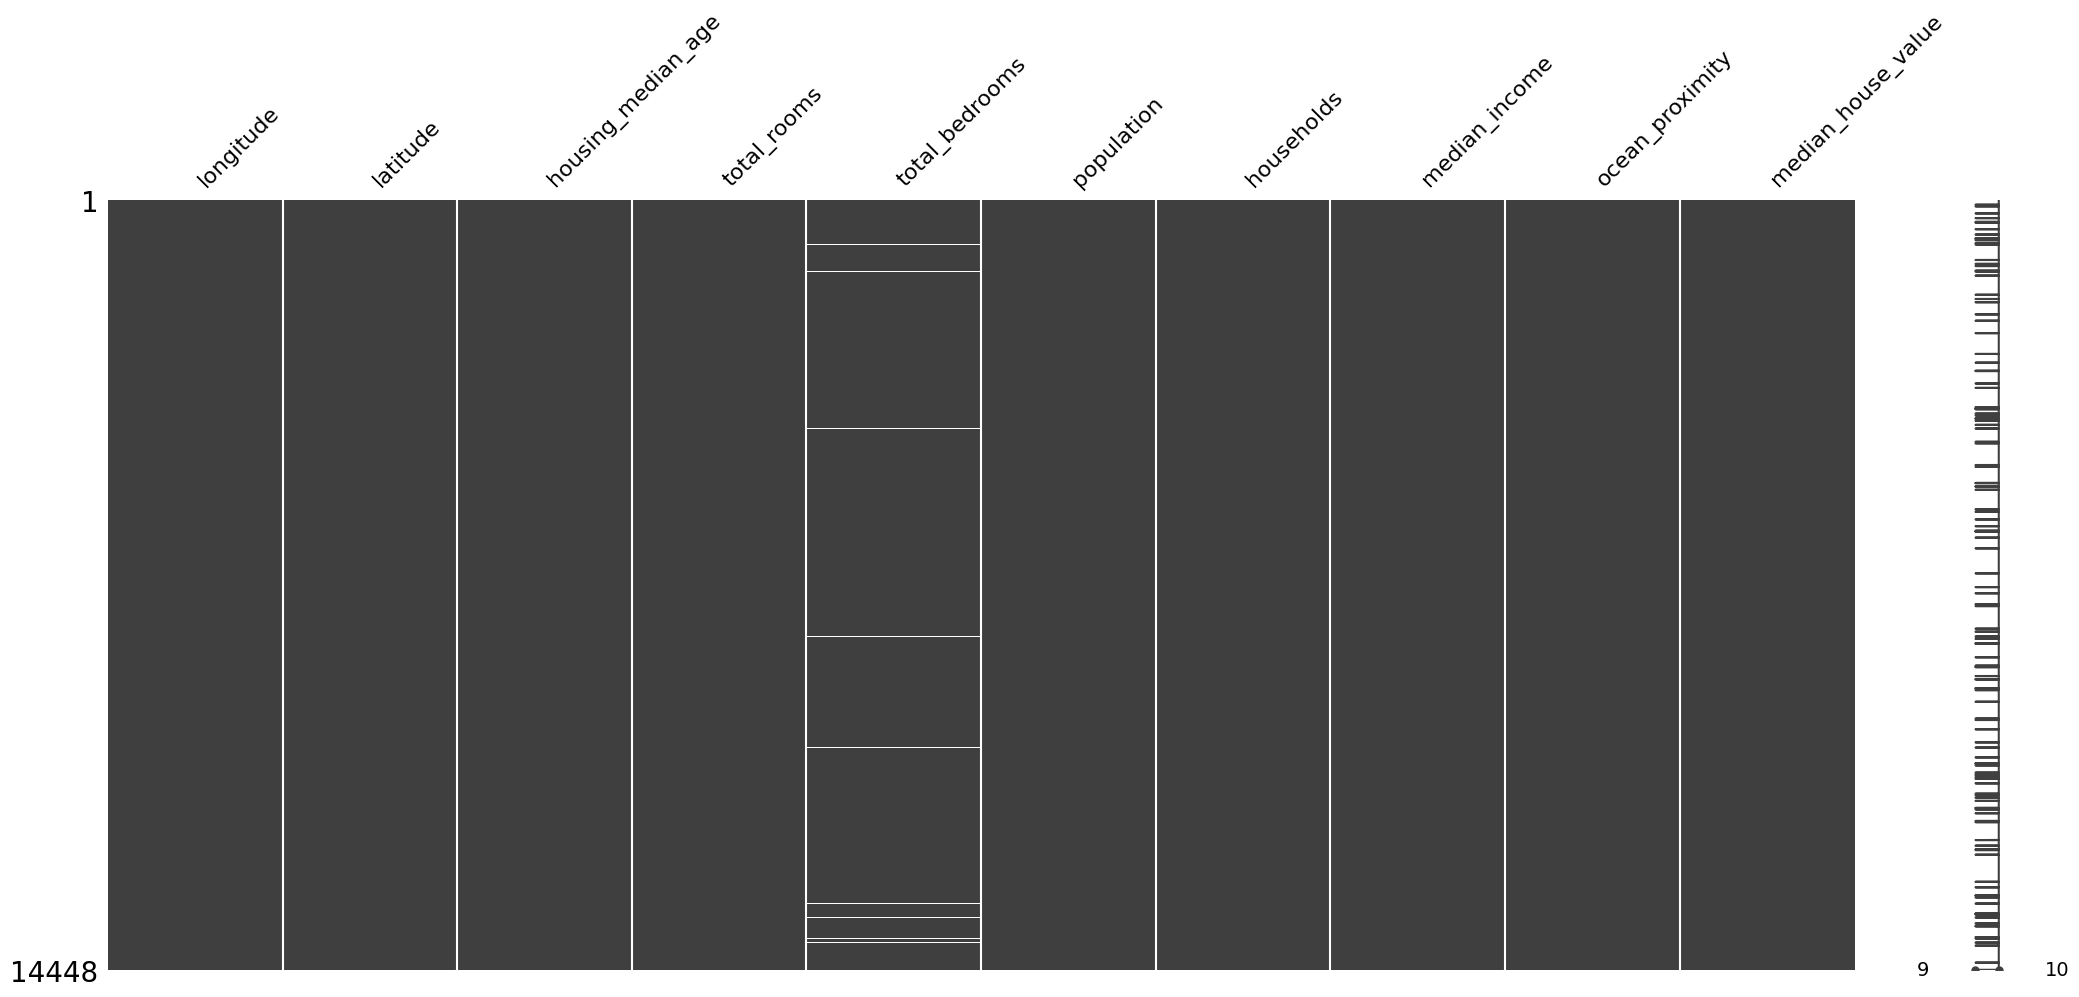

In [24]:
import missingno
missingno.matrix(df_prep)

In [25]:
df_prep.isna().sum().sort_values(ascending = False)

total_bedrooms        137
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat 137 mising values pada total_bedrooms, dan tidak ada missing values pada data lain

In [26]:
df_prep = df_prep.dropna(ignore_index=True)

df_prep.reset_index(drop=True,inplace=True)
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


Melakukan drop kolom pada data yang missing. Hal ini dilakukan karena beberapa hal, yaitu:
1. menghindari pengisian yang tidak akurat
2. menghindari bias
3. menjaga konsistensi dan kualitas data

## Drop

In [27]:
df_prep.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [28]:
df_prep['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: count, dtype: int64

Dari data diatas, didapatkan informasi bahwa kolom island hanya memiliki 2 data. Dengan hanya 2 observasi dalam kategori "ISLAND", data ini terlalu sedikit untuk memberikan kontribusi yang berarti pada pelatihan model. Kategori dengan jumlah data yang sangat sedikit dapat mengganggu model dalam memahami pola yang valid. Maka dari itu akan dilakukan drop untuk baris yang ocean_proximity nya masuk dalam kategori 'ISLAND'

In [29]:
# Menghapus baris 'ISLAND' pada kolom ocean_proximity karena jumlahnya hanya 2
df_prep = df_prep[df_prep['ocean_proximity'] != 'ISLAND']
df_prep['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
Name: count, dtype: int64

In [30]:
df_prep.reset_index(drop=True,inplace=True)
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14304,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14305,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14306,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14307,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## Handling untuk Outliers

In [31]:
numerik2 = df_prep.select_dtypes(include='number')

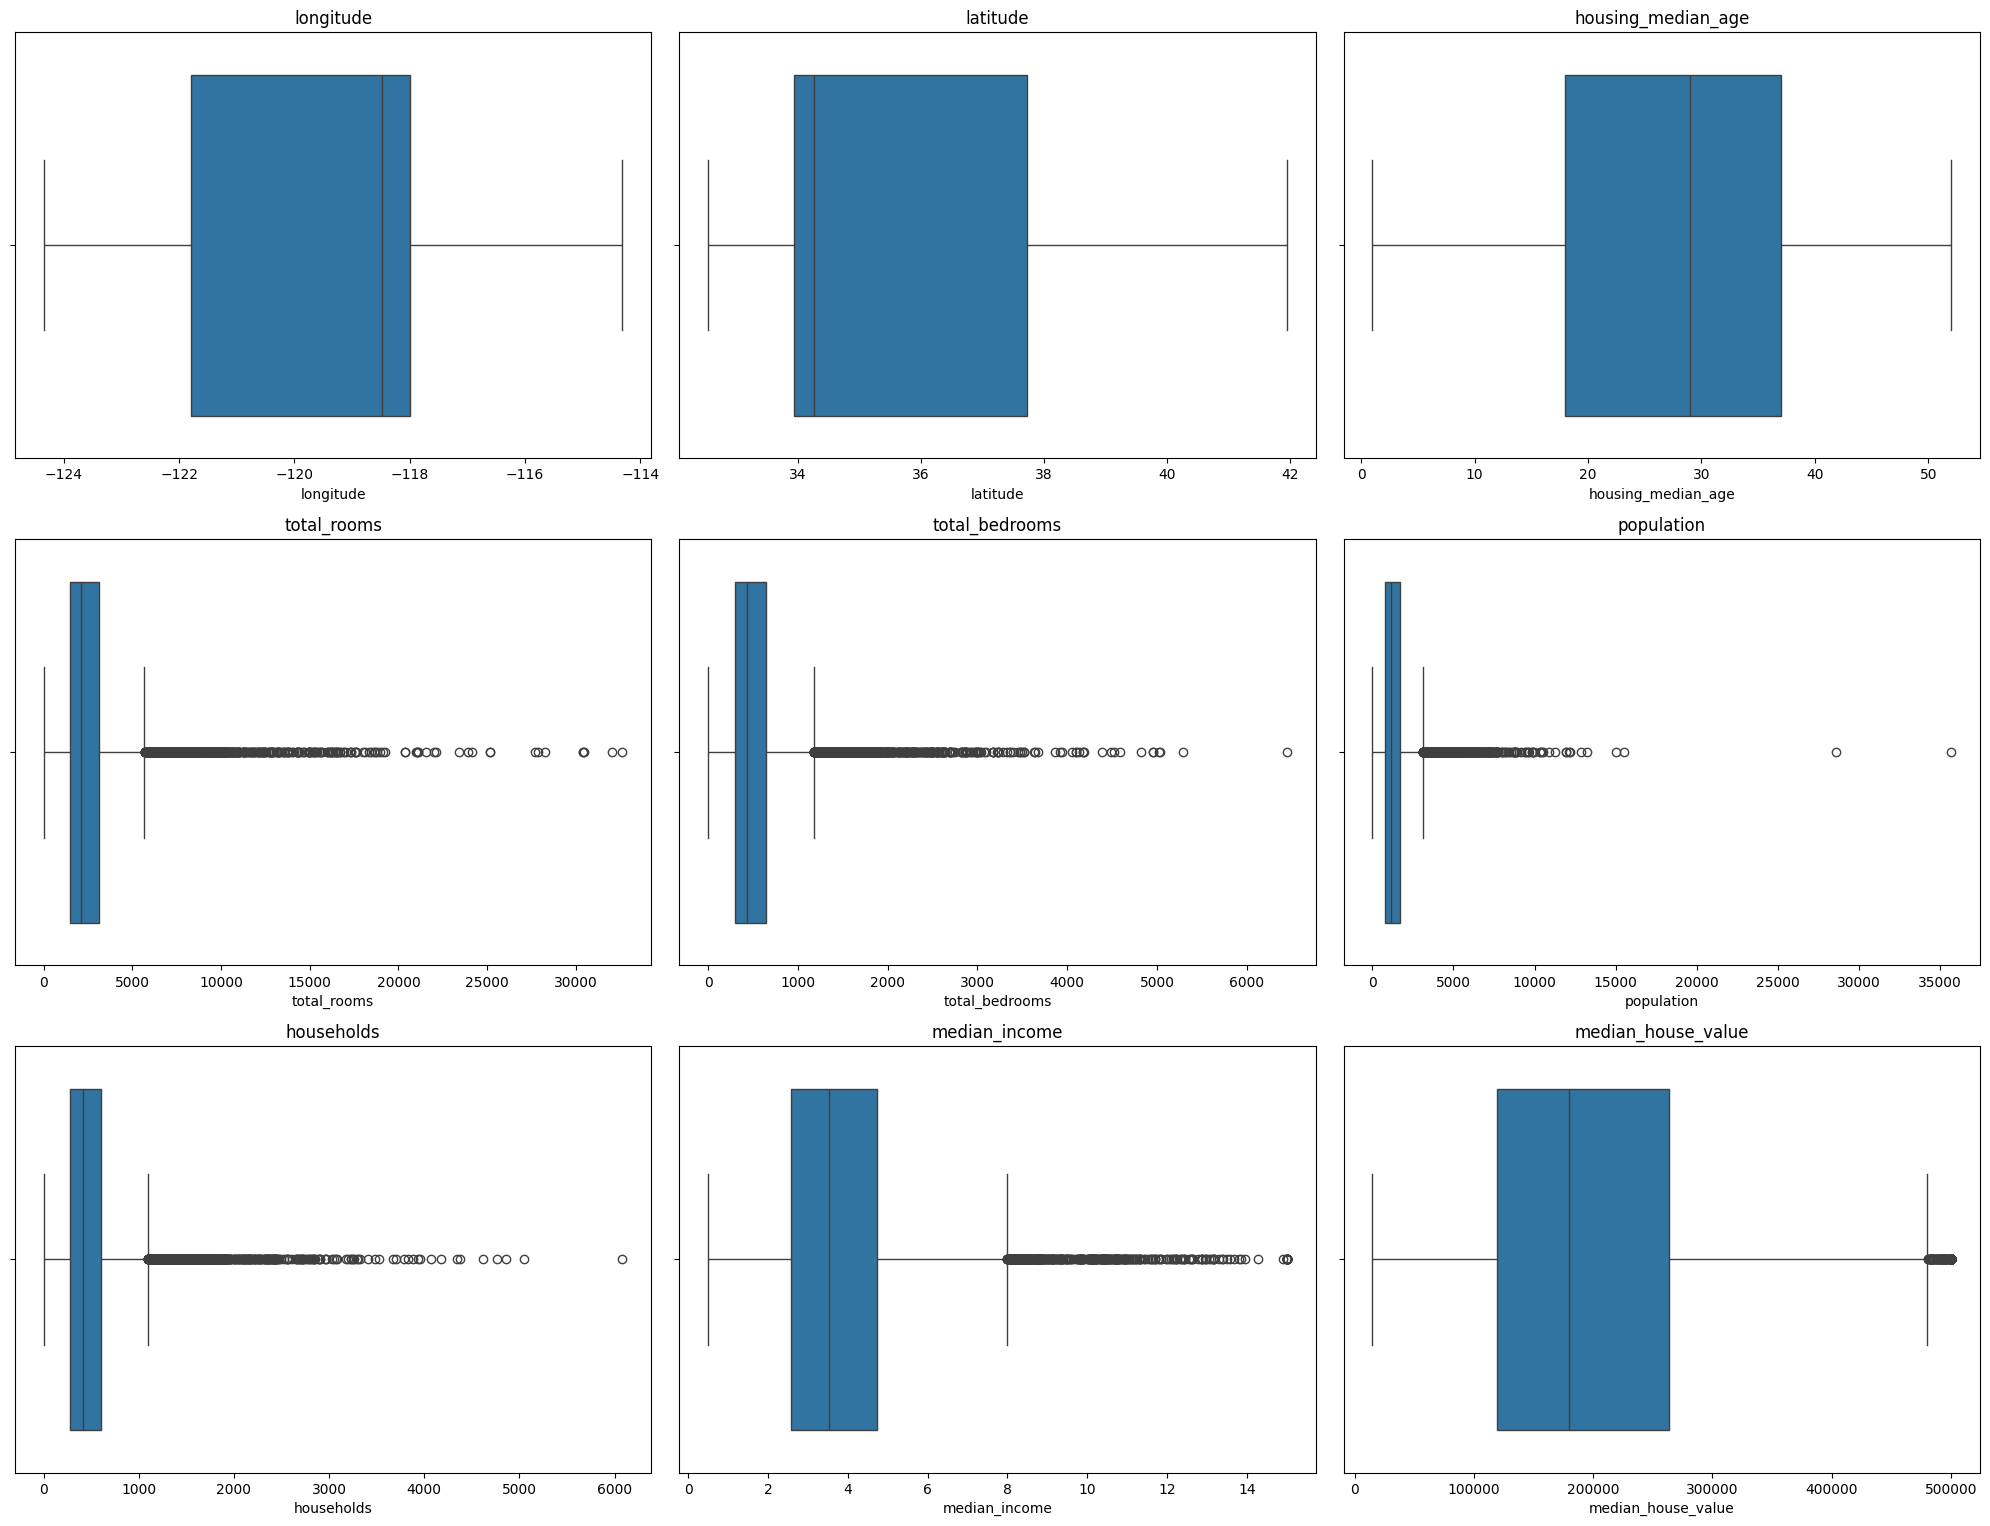

In [32]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik2.columns:
    count += 1
    plt.subplot(4,3,count)
    sns.boxplot(numerik2, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [33]:
for kolom in numerik2.columns:
    q1 = df_raw[kolom].describe().loc['25%']
    q3 = df_raw[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df_raw[(df_raw[kolom] < lower_bound) | (df_raw[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data longitude memiliki outliers 0
data latitude memiliki outliers 0
data housing_median_age memiliki outliers 0
data total_rooms memiliki outliers 900
data total_bedrooms memiliki outliers 879
data population memiliki outliers 827
data households memiliki outliers 842
data median_income memiliki outliers 482
data median_house_value memiliki outliers 757


Dapat dilihat, bahwa semua data kecuali latitude, longitude, dan housing_median_age memiliki outliers. Outliers ini dapat mempengaruhi performa model machine learning. Namun, tidak semua outliers harus dihilangkan, karena outliers ini juga memiliki informasi.

Jika outliers disebabkan oleh kesalahan pengukuran, kesalahan input data, atau anomali yang jelas tidak relevan, maka menghapusnya dapat meningkatkan kualitas data.

In [34]:
for kolom in numerik2.columns:
    q1 = df_raw[kolom].describe().loc['25%']
    q3 = df_raw[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    jumlah_outliers = df_raw[(df_raw[kolom] < lower_bound) | (df_raw[kolom] > upper_bound)].shape[0]
    if jumlah_outliers > 0:
        print(kolom)
        print(f'limit_bawah: {lower_bound}')
        print(f'limit_atas: {upper_bound}\n')
    

total_rooms
limit_bawah: -1094.5
limit_atas: 5693.5

total_bedrooms
limit_bawah: -233.0
limit_atas: 1175.0

population
limit_bawah: -626.0
limit_atas: 3134.0

households
limit_bawah: -208.5
limit_atas: 1091.5

median_income
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001

median_house_value
limit_bawah: -96850.0
limit_atas: 480350.0



In [35]:
pd.DataFrame(numerik2[['total_rooms', 'total_bedrooms','population', 'households','median_income','median_house_value']].describe())

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14309.000000,14309.000000,14309.000000,14309.000000,14309.000000,14309.000000
mean,2641.071913,538.279684,1424.865050,499.508072,3.866934,206772.986861
std,2197.286257,423.598244,1151.842644,383.842698,1.890949,115397.374005
min,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,2125.000000,435.000000,1164.000000,410.000000,3.540300,179900.000000
75%,3142.000000,647.000000,1722.000000,604.000000,4.736100,263700.000000
max,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**total_rooms**

In [36]:
df_prep[df_prep['total_rooms']>=3142]['total_rooms'].value_counts().head()

total_rooms
3184.0    8
3495.0    6
3595.0    6
3250.0    6
3166.0    6
Name: count, dtype: int64

pada total_rooms, tidak ada outliers yang terlalu ekstrim. maka dari itu, tidak perlu dilakukan penghapusan

**total_bedrooms**

In [37]:
df_prep[df_prep['total_bedrooms']>=647]['total_bedrooms'].value_counts().head()

total_bedrooms
661.0    18
667.0    17
662.0    17
648.0    16
652.0    16
Name: count, dtype: int64

pada total_bedrooms, tidak ada outliers yang terlalu ekstrim. maka dari itu, tidak perlu dilakukan penghapusan

**population**

In [38]:
df_prep[df_prep['population']>=1722]['population'].value_counts().head()

population
1992.0    9
1807.0    9
1777.0    9
1724.0    8
1738.0    8
Name: count, dtype: int64

pada population, tidak ada outliers yang terlalu ekstrim. maka dari itu, tidak perlu dilakukan penghapusan

**househoulds**

In [39]:
df_prep[df_prep['households']>=604]['households'].value_counts().head()

households
620.0    19
626.0    18
607.0    17
631.0    17
718.0    16
Name: count, dtype: int64

pada househoulds, tidak ada outliers yang terlalu ekstrim. maka dari itu, tidak perlu dilakukan penghapusan

**median_income**

In [40]:
df_prep[df_prep['median_income']>=4.736100]['median_income'].value_counts().head()

median_income
15.0001    30
4.8750     20
5.0000     16
5.5000     12
6.0000     10
Name: count, dtype: int64

pada median_income, tidak ada outliers yang terlalu ekstrim. maka dari itu, tidak perlu dilakukan penghapusan

**median_house_value**

In [41]:
df_prep[df_prep['median_house_value']>=263700.000000]['median_house_value'].value_counts().head()

median_house_value
500001.0    672
350000.0     56
275000.0     45
450000.0     25
300000.0     20
Name: count, dtype: int64

dapat dilihat, bahwa pada median_house_value memiliki nilai ekstrim bernilai 500001. Terdapat 672 data. Dapat dilihat pada distribution plot juga terlihat ada lonjakkan tinggi dikanan. hal ini perlu dihilangkan untuk meningkatkan performa model

In [42]:
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14304,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14305,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14306,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14307,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [43]:
#Menyaring data dengan median_house_value di atas batas ambang
df_prep = df_prep[df_prep['median_house_value'] < 500001.0]
df_prep = df_prep.reset_index(drop=True)
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
13632,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
13633,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
13634,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
13635,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## Handling Duplicate

In [44]:
# Mengecek apakah ada duplikat dalam DataFrame
if df_prep.duplicated().any():
    print("DataFrame memiliki duplikat.")
else:
    print("DataFrame tidak memiliki duplikat.")

DataFrame tidak memiliki duplikat.


Karena dataframe tidak memiliki duplikat, berarti tidak ada yang perlu dilakukan di tahap ini

## Clean Data

In [83]:
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,geo_cluster
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,4.825000,2.800000,0.250000,3
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.018051,3.671480,0.322517,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3.810440,6.478022,0.167939,1
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.051000,2.518000,0.474980,1
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,3.628743,4.622754,0.251295,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,3.684211,4.742105,0.203108,3
13633,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,3.251142,6.000000,0.174277,2
13634,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,3.095694,5.349282,0.174419,2
13635,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,2.247863,4.540598,0.234353,1


berikut merupakan data yang sudah clean.

## Feature Engineering

Feature engineering adalah langkah penting dalam proses analisis data yang bertujuan untuk menciptakan fitur baru atau mengubah fitur yang ada agar model pembelajaran mesin dapat bekerja lebih efektif. 

Berikut merupakan penjelasan mengenai penambahan feature engineering:
1. **population_per_household** : Rasio ini bisa memberikan informasi tentang tingkat kepadatan penduduk di suatu area, yang mungkin sangat berpengaruh terhadap nilai rumah.
2. **rooms_per_household** : Menunjukkan rata-rata jumlah kamar per rumah tangga, yang dapat mempengaruhi nilai properti.
3. **bedrooms_per_room** : Rasio ini dapat memberikan gambaran tentang ukuran rata-rata kamar tidur dalam rumah, yang bisa relevan untuk nilai rumah.
4. **geo_cluster** :  Clustering berdasarkan lokasi geografis dapat membantu dalam mengidentifikasi pola regional yang mempengaruhi nilai rumah.

In [45]:
df_prep['population_per_household'] = df_prep['population'] / df_prep['households']

df_prep['rooms_per_household'] = df_prep['total_rooms'] / df_prep['households']

df_prep['bedrooms_per_room'] = df_prep['total_bedrooms'] / df_prep['total_rooms']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df_prep['geo_cluster'] = kmeans.fit_predict(df_prep[['longitude', 'latitude']])
df_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,geo_cluster
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,4.825000,2.800000,0.250000,3
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.018051,3.671480,0.322517,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3.810440,6.478022,0.167939,1
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.051000,2.518000,0.474980,1
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,3.628743,4.622754,0.251295,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,3.684211,4.742105,0.203108,3
13633,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,3.251142,6.000000,0.174277,2
13634,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,3.095694,5.349282,0.174419,2
13635,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,2.247863,4.540598,0.234353,1


## Data Splitting

In [46]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
X = df_prep.drop(columns = ['median_house_value'])
y=df_prep['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)

## Scalling

Akan dilakukan scalling untuk variabel X pada model. Scaling digunakan untuk memastikan bahwa fitur-fitur dalam dataset memiliki skala yang serupa, sehingga membantu algoritma machine learning untuk bekerja secara efisien, menghasilkan hasil yang lebih baik, dan memudahkan interpretasi model.

In [47]:
df_prep.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,population_per_household,rooms_per_household,bedrooms_per_room,geo_cluster
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,4.825000,2.800000,0.250000,3
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.018051,3.671480,0.322517,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3.810440,6.478022,0.167939,1
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.051000,2.518000,0.474980,1
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,3.628743,4.622754,0.251295,3


In [48]:
df_prep.isna().sum().sort_values(ascending = False)

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
median_house_value          0
population_per_household    0
rooms_per_household         0
bedrooms_per_room           0
geo_cluster                 0
dtype: int64

In [49]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

persiapan scaler menggunakan RobustScaler, ada beberapa alasan mengapa menggunakan robust scaler dibandingkan scaler yang lain, yaitu:

1. **ketahanan terhadap outliers** : Robust Scaler menggunakan median dan interquartile range (IQR) untuk scaling, yang lebih tahan terhadap outliers. Median dan IQR tidak terpengaruh oleh outliers seperti mean dan range. Oleh karena itu, Robust Scaler menghasilkan scaling yang lebih representatif untuk sebagian besar data meskipun terdapat outliers.
2. **Distribusi data yang tidak normal** : Robust Scaler tidak mengasumsikan distribusi data tertentu, membuatnya lebih fleksibel dan cocok untuk berbagai jenis distribusi data.
3. **Peningkatan Kinerja Model** : Dengan mengurangi dampak outliers, Robust Scaler dapat membantu model untuk lebih fokus pada pola yang ada dalam data, meningkatkan generalisasi dan akurasi model pada data baru.

Robust Scaler adalah pilihan yang sangat baik ketika data memiliki outliers atau tidak mengikuti distribusi normal. Dengan menggunakan median dan IQR untuk scaling, Robust Scaler menyediakan cara yang lebih tahan terhadap outliers, memastikan representasi data yang lebih konsisten dan meningkatkan kinerja model dalam banyak kasus.

## One Hot Encoder

In [50]:
kategorik = df_prep.select_dtypes(exclude='number')

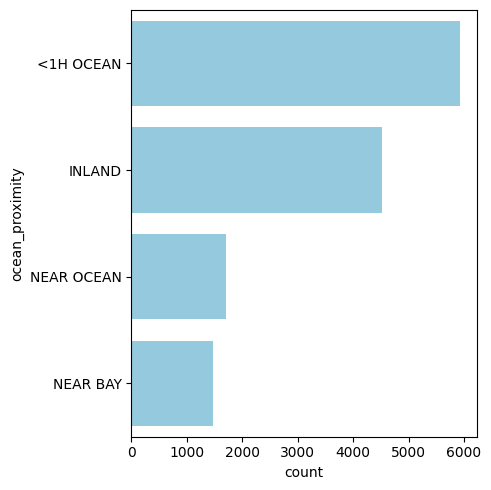

In [51]:
count = 0
fig = plt.figure(figsize=(5,5))
for kolom in kategorik.columns:
    count += 1
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('encoder_onehot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['ocean_proximity']),
], remainder='passthrough')

Dalam data california house, terdapat 1 kolom yang berupa kategorikal, yaitu kolom "ocean_proximity". kolom tersebut akan dilakukan onehot encoding untuk kebutuhan menjalankan algoritma model. berikut merupakan mengapa digunakan onehot encoding untuk kolom tersebut:
1. **Menangani Data Kategori** : Model machine learning sebagian besar bekerja dengan data numerik. One-hot encoding mengubah setiap kategori menjadi vektor biner yang terpisah, memungkinkan model untuk menangani data kategori ini secara efektif.
2. **Mencegah Interpretasi yang Salah** : Jika variabel kategori dikodekan secara langsung sebagai angka (misalnya, 'Near bat' = 1, 'Near Ocean' = 2, 'Inland' = 3), model mungkin salah menginterpretasikan hubungan ordinal antara kategori-kategori tersebut. One-hot encoding mencegah model membuat asumsi ini dengan mengubah setiap kategori menjadi kolom biner terpisah.

# Modelling

## Benchmark Model

In [53]:
# import library

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # binary encoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold # kalau regresi KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

# siapkan model yang akan di benchmark / diuji
lr = LinearRegression()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)

Untuk tahap awal, akan dilakukan benchmark model. Terdapat 6 model algoritma yang akan dilakukan, berikut merupakan list dan penjelasannya:
1. **Linear regression**: Linear Regression mencari garis terbaik yang meminimalkan jumlah kuadrat kesalahan antara nilai prediksi dan nilai aktual. Model ini diasumsikan memiliki hubungan linear antara variabel independen (fitur) dan variabel dependen (target).
2. **Decision Tree**: Decision Tree mempartisi ruang fitur menjadi beberapa bagian berdasarkan kondisi pada fitur. Pada setiap node, algoritma memilih fitur dan titik potong yang memaksimalkan pengurangan impurity (misalnya, mean squared error untuk regresi). Proses berlanjut sampai semua data dibagi dengan baik atau memenuhi kriteria penghentian (misalnya, kedalaman maksimal atau jumlah sampel minimum di node).
3. **KNeighbors**: memprediksi nilai target berdasarkan rata-rata dari nilai target dari k tetangga terdekat dalam ruang fitur. Jarak antara sampel diukur menggunakan metrik jarak (misalnya, Euclidean distance). Model ini non-parametrik, yang berarti tidak ada asumsi distribusi data yang mendasarinya.
4. **Random Forest**: Random Forest adalah ensemble dari banyak Decision Trees. Setiap pohon dilatih menggunakan subset acak dari data pelatihan dan subset acak dari fitur.
Prediksi akhir diperoleh dengan mengambil rata-rata prediksi dari semua pohon dalam hutan. Pendekatan ini membantu mengurangi overfitting dan meningkatkan generalisasi.
5. **XGBoost**: XGBoost adalah implementasi optimasi dari Gradient Boosting yang menggabungkan banyak model lemah (biasanya Decision Trees) secara berurutan.
Setiap model baru dilatih untuk memperbaiki kesalahan dari model sebelumnya dengan meminimalkan fungsi loss. XGBoost menggunakan teknik seperti regularisasi, parallel processing, dan pruning untuk meningkatkan kinerja dan efisiensi.
6. **Gradient Boosting**: Gradient Boosting membangun model secara berurutan, di mana setiap model baru dilatih untuk memperbaiki kesalahan dari model sebelumnya. Model pertama adalah prediksi rata-rata. Kemudian, model berikutnya dilatih untuk memprediksi residu (kesalahan) dari model sebelumnya. Proses ini diulangi sampai sejumlah model tertentu dibuat atau sampai kesalahan menurun di bawah ambang batas tertentu.

Secara singkat, dapat dijelaskan bahwa:
- Linear Regression: Model sederhana dengan asumsi linear.
- Decision Tree: Model berbasis pohon yang membagi data menjadi segmen-segmen.
- KNeighbors Regressor: Model berbasis tetangga terdekat.
- Random Forest Regressor: Ensemble dari Decision Trees untuk meningkatkan akurasi dan stabilitas.
- XGBoost: Implementasi efisien dari Gradient Boosting dengan berbagai teknik optimasi.
- Gradient Boosting Regressor: Ensemble berbasis boosting yang membangun model berurutan untuk mengurangi kesalahan.

## Training dan validasi model

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

models = [lr, tree, knn, rf, xgb, gb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=10)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

Akan digunakan 4 metric dalam menjalankan model kali ini, yaitu RMSE, MAE, MAPE dan r-squared, berikut merupakan penjelasannya:
1. Root Mean Squared Error (RMSE): 
    - Sensitivitas terhadap Outlier: RMSE mengkuadratkan error sebelum menjumlahkannya, yang memberikan bobot lebih besar pada error yang lebih besar. Ini berarti RMSE sangat sensitif terhadap outlier. Jika ada outlier yang signifikan dalam data, RMSE akan menunjukkan bahwa model memiliki kesalahan prediksi yang besar.
    - Penilaian Kinerja Keseluruhan: RMSE memberikan gambaran umum tentang seberapa besar prediksi model menyimpang dari nilai sebenarnya. Ini memberikan indikasi yang jelas tentang kinerja model secara keseluruhan.
2. Mean Absolute Error (MAE):
    - Kemudahan Interpretasi: MAE adalah rata-rata dari semua kesalahan absolut antara prediksi dan nilai aktual. Ini mudah diinterpretasikan sebagai "rata-rata error" dalam satuan yang sama dengan target variabel.
3. Mean Absolute Percentage Error (MAPE):
    - Skala Invarian: MAPE menormalisasi error dengan membaginya dengan nilai aktual, sehingga menghasilkan persentase. Ini membuat MAPE mudah dipahami dan berguna untuk membandingkan kinerja model di berbagai skala.
    - Penilaian Proporsional: MAPE menunjukkan rata-rata kesalahan prediksi sebagai persentase dari nilai aktual, memberikan pemahaman tentang seberapa besar kesalahan relatif terhadap nilai sebenarnya.
4. R-squared (R²):
    - Penjelasan Variansi: R-squared mengukur proporsi variansi dalam data yang bisa dijelaskan oleh model. Ini memberikan gambaran seberapa baik model menangkap variasi dalam data.
    - Indikasi Fit Model: Nilai R-squared yang mendekati 1 menunjukkan bahwa model memiliki kecocokan yang baik dengan data, sedangkan nilai yang mendekati 0 menunjukkan bahwa model gagal menangkap variabilitas dalam data.

**HUBUNGAN METRIC DENGAN KEBUTUHAN BISNIS**
berikut merupakan hubungan metric yang digunakan dengan kebutuhan bisnis ini:
1. Root Mean Squared Error (RMSE):
    - Estimasi Biaya: RMSE memberikan gambaran tentang kesalahan prediksi model dalam satuan aslinya, yang dapat membantu dalam mengestimasi biaya atau kerugian yang mungkin terjadi akibat kesalahan prediksi. Dalam konteks bisnis, ini bisa berarti biaya tambahan atau keuntungan yang terlewat karena prediksi yang tidak akurat.
2. Mean Absolute Error (MAE):
    - Akurasi Rata-rata: MAE memberikan gambaran langsung tentang rata-rata error prediksi, yang bisa digunakan untuk menetapkan ekspektasi realistis tentang akurasi prediksi model dalam operasi sehari-hari. Misalnya, jika MAE adalah $28161, bisnis bisa mengantisipasi deviasi rata-rata ini saat membuat keputusan berdasarkan prediksi model.
3. Mean Absolute Percentage Error (MAPE):
    - Persentase Error: MAPE menampilkan kesalahan dalam bentuk persentase, yang memudahkan interpretasi dalam konteks bisnis. Misalnya, MAPE sebesar 16% menunjukkan bahwa prediksi model rata-rata meleset sebesar 16% dari nilai sebenarnya, membantu bisnis memahami skala kesalahan relatif terhadap ukuran data mereka.
4. R-squared (R²):
    - Penjelasan Variansi: R-squared menunjukkan seberapa baik model menjelaskan variansi dalam data. R-squared sebesar 0.82 menunjukkan bahwa 82% variansi dalam data dapat dijelaskan oleh model, memberikan keyakinan bahwa model ini cukup andal untuk menangkap faktor-faktor yang mempengaruhi target variabel.

Dalam konteks bisnis, penggunaan metrik evaluasi seperti RMSE, MAE, MAPE, dan R-squared membantu dalam:

Mengelola Risiko: Memahami dan mengelola risiko kesalahan prediksi dengan lebih baik.
Meningkatkan Akurasi Keputusan: Membuat keputusan bisnis yang lebih tepat dan akurat berdasarkan prediksi model.
Mengoptimalkan Sumber Daya: Mengalokasikan sumber daya dengan lebih efisien berdasarkan prediksi yang andal.
Memonitor dan Mengevaluasi Kinerja: Secara terus-menerus memonitor dan mengevaluasi kinerja model untuk memastikan bahwa model tetap relevan dan akurat dalam kondisi bisnis yang berubah.
Dengan kata lain, pemahaman mendalam tentang metrik ini memungkinkan bisnis untuk mengoptimalkan strategi mereka, meminimalkan risiko, dan memaksimalkan keuntungan.

## Model Selection

In [55]:
# Evaluasi dan pemilihan hasil dari 5 algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'KNN Regressor', 'RandomForest Regressor', 'XGBoost Regressor','Gradient Boosting Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-60263.804723,1008.874321,-44037.321540,701.102204,-0.267259,0.005047
1,Decision Tree Regressor,-64963.152801,1662.180682,-43292.134654,954.137296,-0.248043,0.011126
2,KNN Regressor,-56510.890057,1583.447049,-39473.644614,1096.194710,-0.230329,0.007575
3,RandomForest Regressor,-46990.877238,1450.070317,-31791.049527,748.644144,-0.185413,0.003940
4,XGBoost Regressor,-44575.942993,1119.381270,-29948.988888,603.275101,-0.175745,0.004515
5,Gradient Boosting Regressor,-48461.435439,843.262093,-34093.189857,543.582184,-0.201532,0.003710


Berdasarkan data diatas, informasi yang dapat diambil adalah:
- Dari hasil mean dan standar deviasi dari score RMSE, MAE, dan MAPE, performa terbaik adalah:
    1. XGBoost Regressor
    2. RandomForest Regressor
    3. GradientBoosting Regressor

maka dari itu, kedua model ini akan dibandingkan dan di tuning lebih lanjut.

## Prediksi

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

# Benchmark 3 model terbaik
models = {
    'RandomForest': rf,
    'XGBoost': xgb,
    'GradientBoosting' : gb
}

score_rmse = []
score_mae = []
score_mape = []
score_r_squared = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r_squared.append(r2_score(y_test, y_pred))
score_sebelum_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'r_squared': score_r_squared}, index=models.keys())
score_sebelum_tuning

,RMSE,MAE,MAPE,r_squared
RandomForest,46395.976106,31525.214435,0.184364,0.771985
XGBoost,43220.901182,29516.747985,0.172749,0.802125
GradientBoosting,47715.700539,33586.633426,0.200891,0.758828


Dari hasil prediksi diatas, dapat diambil informasi bahwa:
1. RMSE, MAE, dan MAPE paling kecil dimiliki oleh XGBoost dan diikuti oleh RandomForest
2. r-squared terbesar dimiliki oleh XGBoost dan diikuti oleh RandomForest Regressor

Dari informasi diatas, dapat diambil informasi bahwa XGBoost Regressor merupakan model yang paling baik dalam memprediksi harga rumah dan diikuti oleh RandomForest Regressor. 

**NOTES (interpretasi untuk XGBoost)**
- RMSE : nilai rata-rata kesalahan antara prediksi dan nilai sebenarnya adalah 43220 USD.
- MAE : rata-rata kesalahan absolut pada prediksi adalah 29516 USD.
- MAPE : rata-rata kesalahan prediksi dalam persentase terhadap nilai sebenarnya adalah 0.172749 atau setara dengan 17,2%
- R squared : model ini mampu menjelaskan 80.2% variasi dari data target (y) berdasarkan variabel prediktor (X).

## Hyperparameter Tuning

Hyperparameter tuning dilakukan untuk meningkatkan kinerja model dengan menemukan kombinasi hyperparameter yang menghasilkan performa terbaik, seperti akurasi yang lebih tinggi, error yang lebih rendah, atau generalisasi yang lebih baik pada data baru. Dengan mencari kombinasi hyperparameter yang optimal, kita dapat mengoptimalkan kinerja model dan meningkatkan kemampuannya dalam melakukan prediksi atau klasifikasi.

Maka dari itu, akan dilakukan hyperparameter tuning pada 2 model terbaik dari hasil sebelumnya, yaitu XGBoost dan RandomForest Regressor

### RandomForest Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameter tuning
hyperparam_rf = {
    'model__criterion': ['squared_error', 'absolute_error', 'poisson'],       # menentukan fungsi untuk mengukur kualitas pemisahan pada setiap node dalam pohon keputusan.
    'model__max_features': list(np.arange(2, 12, 1)),                         # menentukan jumlah fitur yang akan dipertimbangkan saat mencari pemisahan terbaik.
    'model__max_depth': [None] + list(np.arange(2, 10, 20)),                  # menentukan kedalaman maksimum dari setiap pohon keputusan dalam ensemble. 
    'model__n_estimators': list(np.arange(100, 200, 300)),                    # jumlah pohon dalam ensemble Random Forest. 
    'model__min_samples_split': list(np.arange(2, 5, 10)),                    # menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. 
}

crossval = KFold(n_splits=5,shuffle=True,random_state=42)

estimator = Pipeline([
    ('preprocessing',transformer),
    ('scaler',scaler),
    ('model',rf)
])

random_rf = RandomizedSearchCV(
    estimator,
    param_distributions = hyperparam_rf,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi,
    n_iter=50,
    random_state = 42
)

random_rf.fit(X_train,y_train)

# Hasil terbaik
print("Best Score:", random_rf.best_score_)
print("Best Params:", random_rf.best_params_)

Best Score: -0.17871691427377162
Best Params: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 11, 'model__max_depth': None, 'model__criterion': 'poisson'}


Parameter Hyperparameter terbaik: 
- model__n_estimators : 100
- model__min_samples_split : 2
- model__max_features : 11
- model__max_depth : None
- model__criterion : poisson

In [58]:
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__max_features,param_model__max_depth,param_model__criterion,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
1,11.813558,0.229194,0.112153,0.009581,100,2,7,None,squared_error,"{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 7, 'model__max_depth': None, 'model__criterion': 'squared_error'}",...,301.900072,1,-0.177143,-0.177689,-0.177699,-0.178186,-0.187118,-0.179567,0.003790,7
40,13.232021,0.622009,0.109268,0.009898,100,2,6,None,poisson,"{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 6, 'model__max_depth': None, 'model__criterion': 'poisson'}",...,367.583259,3,-0.177365,-0.178306,-0.178385,-0.175374,-0.187496,-0.179385,0.004198,6
3,15.671634,0.685991,0.103664,0.005322,100,2,7,None,poisson,"{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 7, 'model__max_depth': None, 'model__criterion': 'poisson'}",...,305.530513,4,-0.176739,-0.177175,-0.179282,-0.177147,-0.186139,-0.179296,0.003535,5
19,9.910230,0.033624,0.105523,0.005078,100,2,6,None,squared_error,"{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 6, 'model__max_depth': None, 'model__criterion': 'squared_error'}",...,422.489165,9,-0.178390,-0.179274,-0.180673,-0.178251,-0.189656,-0.181249,0.004291,11
32,234.549067,1.726667,0.102437,0.000625,100,2,6,None,absolute_error,"{'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 6, 'model__max_depth': None, 'model__criterion': 'absolute_error'}",...,383.844819,11,-0.179854,-0.181982,-0.182009,-0.178345,-0.191364,-0.182711,0.004541,16


### XGBoost Tuning

In [59]:
# Hyperparameter tuning
hyperparam_xgb = {
    'model__n_estimators': [100, 200, 300],                         # jumlah pohon dalam model
    'model__max_depth': [3, 5, 7, 10],                              # kedalaman maksimum dari setiap pohon dalam model 
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],                 # tingkat pembelajaran (learning rate) yang mengontrol kontribusi setiap pohon dalam model.
    'model__subsample': [0.8, 0.9, 1.0],                            # fraksi dari dataset yang akan digunakan untuk melatih setiap pohon.
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],           # fraksi dari fitur yang akan digunakan untuk melatih setiap pohon. 
    'model__gamma': [0, 0.1, 0.2, 0.3, 0.4],                        # parameter yang mengontrol apakah sebuah node akan dibagi menjadi anak-anaknya berdasarkan peningkatan dalam evaluasi objektif yang dihasilkan oleh pembelajaran.
    'model__reg_alpha': [0, 0.1, 0.5, 1, 10],                       # parameter regularisasi L1 (Lasso) yang digunakan dalam pembelajaran XGBoost.
    'model__reg_lambda': [0, 0.1, 0.5, 1, 10],                      # regularisasi L2 (Ridge) yang digunakan dalam pembelajaran XGBoost.
}

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan estimator pipeline
estimator = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', xgb)
])

# Buat objek RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=hyperparam_xgb,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',  # Pilih metrik untuk optimisasi
    n_iter=50,  # Atur jumlah iterasi
    random_state=42
)

# Lakukan penyetelan hiperparameter
random_xgb.fit(X_train, y_train)

# Hasil terbaik
print("Best Score:", random_xgb.best_score_)
print("Best Params:", random_xgb.best_params_)

Best Score: -0.16507869151677984
Best Params: {'model__subsample': 0.9, 'model__reg_lambda': 10, 'model__reg_alpha': 0.1, 'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__colsample_bytree': 1.0}


Parameter Hyperparameter terbaik: 
- model__subsample: 0.9
- model__reg_lambda : 10
- model__reg_alpha : 0.1
- model__n_estimators : 200
- model__max_depth : 10
- model__learning_rate : 0.05
- model__gamma : 0.3
- model__colsample_bytree : 1.0

In [60]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
29,4.424005,0.143967,0.063898,0.005678,1.0,0.1,1,300,7,0.05,...,261.841915,1,-0.163644,-0.163916,-0.163094,-0.164501,-0.172385,-0.165508,0.003468,2
12,5.042053,0.624010,0.054556,0.007784,0.8,0.5,0.1,300,7,0.1,...,478.920796,2,-0.166748,-0.170102,-0.164106,-0.162068,-0.173911,-0.167387,0.004228,4
11,2.909104,0.172201,0.038178,0.003696,1.0,0.1,10,200,7,0.05,...,290.546563,5,-0.167246,-0.165128,-0.165748,-0.167308,-0.174230,-0.167932,0.003261,6
19,10.260017,0.513084,0.088976,0.003498,0.9,0,10,200,10,0.05,...,349.283778,6,-0.167687,-0.167428,-0.168744,-0.167103,-0.174404,-0.169073,0.002722,8
26,10.872500,0.461657,0.070911,0.009757,0.9,10,0.1,200,10,0.05,...,246.870359,3,-0.161259,-0.164751,-0.165947,-0.162964,-0.170473,-0.165079,0.003131,1


**Prediksi pada test set dengan model yang sudah di tuning**

RandomForest Regressor after tuning

In [61]:
model = {'RandomForest': rf}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

# Skor RMSE, MAE, RMSLE, dan MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
r_squared_rf_tuning = r2_score(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
RandomForest,45248.090756,30642.108182,0.178066


XGBoost Regressor after tuning

In [104]:
model = {'XGBoost': xgb}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Skor RMSE, MAE, RMSLE, dan MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r_squared_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGBoost,42404.97609,28161.57332,0.163196


In [63]:
#Skor R-Square setelah tuning
print('Random Forest')
print(f'{rf_tuning.score(X_test,y_test)}')

print('\nXGBoost')
print(f'{xgb_tuning.score(X_test,y_test)}')

Random Forest
0.7831276763193916

XGBoost
0.8095253166129023


Dari informasi diatas, dapat dilihat bahwa RMSE, MAE, dan MAPE dari XGBoost lebih baik dibandingkan dengan RandomForest Regressor

# Evaluation

Benchmark vs Model setelah Tuning

In [64]:
#Benchmark Model
pd.DataFrame(score_sebelum_tuning.loc['RandomForest'])

,RandomForest
RMSE,46395.976106
MAE,31525.214435
MAPE,0.184364
r_squared,0.771985


In [65]:
#Tuned Model
print('Random Forest')

#Skor R-Square setelah tuning
print(f'r-squred: {rf_tuning.score(X_test,y_test)}')
score_after_tuning_rf

Random Forest
r-squred: 0.7831276763193916


,RMSE,MAE,MAPE
RandomForest,45248.090756,30642.108182,0.178066


In [66]:
pd.DataFrame(score_sebelum_tuning.loc['XGBoost'])

,XGBoost
RMSE,43220.901182
MAE,29516.747985
MAPE,0.172749
r_squared,0.802125


In [67]:
#Tuned Model
print('\nXGBoost')

#Skor R-Square setelah tuning
print(f'r-squred: {xgb_tuning.score(X_test,y_test)}')
score_after_tuning_xgb


XGBoost
r-squred: 0.8095253166129023


,RMSE,MAE,MAPE
XGBoost,42404.97609,28161.57332,0.163196


Dapat dilihat, dari Random Forest maupun XGBoost regressor, keduanya mengalami peningkatan setelah dilakukan hyperparameter tuning, namun, XGBoost lebih baik dari RMSE, MAE, MAPE, dan r-squarednya dibandingkan dengan Randomforest regresssor

**Perbandingan XGBoost dan RandomForest Regressor setelah tuning**:
- RMSE ; MAE ; MAPE ; R2 (XGBoost)      --> 42404 ; 28161 ; 0.163 ; 0.809
- RMSE ; MAE ; MAPE ; R2 (RandomForest) --> 45248 ; 30642 ; 0.178 ; 0.783

**Perbandingan XGBoost Regressor sebelum dan sesudah tuning**:
- RMSE ; MAE ; MAPE ; R2 (setelah)      --> 42404 ; 28161 ; 0.163 ; 0.809
- RMSE ; MAE ; MAPE ; R2 (sebelum)      --> 43220 ; 29516 ; 0.172 ; 0.802

## Actual vs Prediction Plot

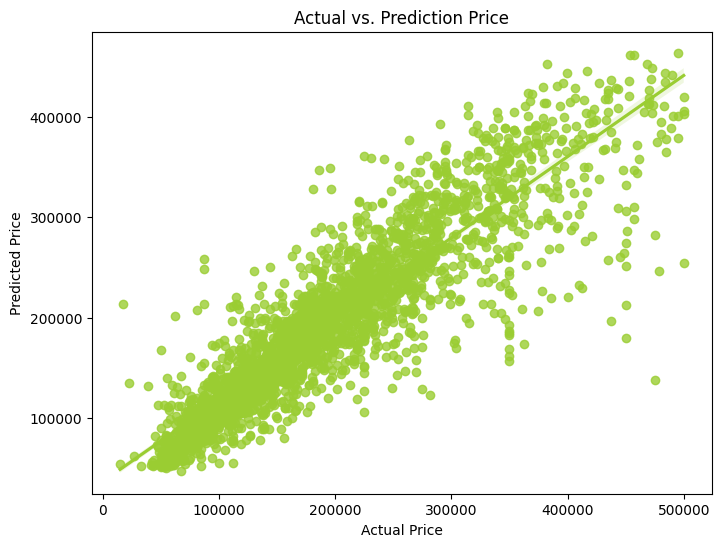

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, y=y_pred_xgb_tuning,color='yellowgreen')
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

Dari hasil visualisasi grafik diatas antara actual price (X) dan predicted price (y), dapat dilihat bahwa grafik ini membentuk pola yang linear. dapat dilihat bahwa memang masih ada beberapa nilai yang masih salah memprediksi harga nilai rumah. Namun, dengan tingkat MAPE senilai 0.163 (16,3%), hal ini masih masih tergolong dalam kategori baik.

Source : C. D. Lewis, Industrial and business forecasting methods: A practical guide to exponential
smoothing and curve fitting, 1982.

## Feature Importances

selanjutnya akan dilakukan pencarian feature importances. Feature importances digunakan untuk mengetahui seberapa penting setiap fitur (variabel) dalam membuat prediksi menggunakan model machine learning. Informasi ini membantu dalam pemahaman terhadap proses pengambilan keputusan oleh model, serta dapat memberikan wawasan tentang faktor-faktor apa yang paling berpengaruh terhadap hasil prediksi.

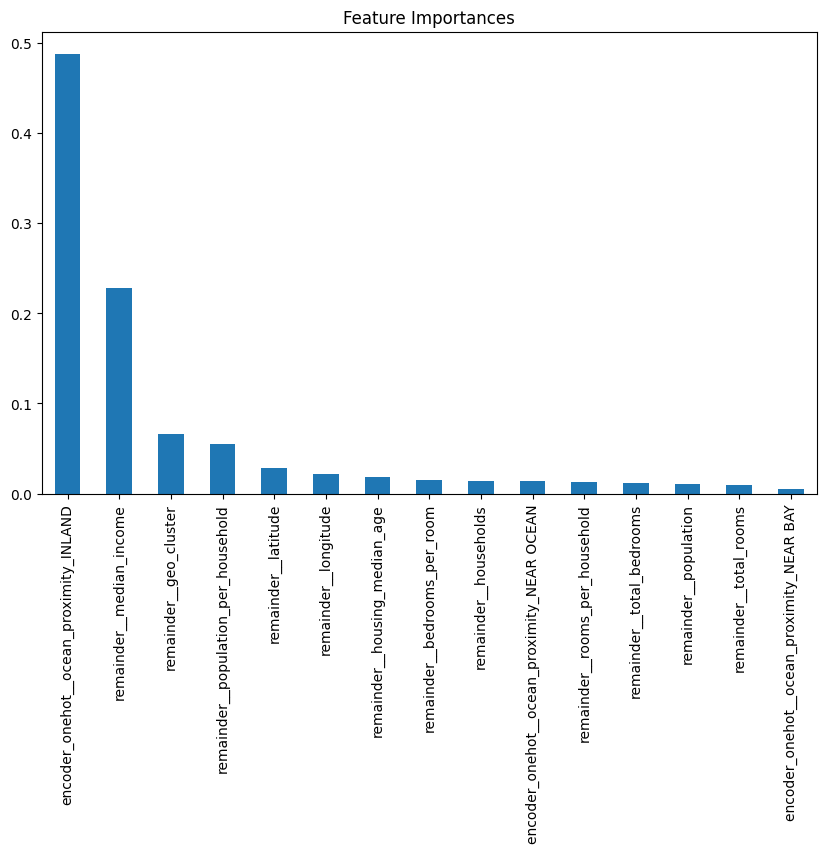

In [70]:
# Ekstrak model terbaik dari hasil RandomizedSearchCV
best_pipeline = xgb_tuning

# Ekstrak model XGBoost dari pipeline
best_xgb_model = best_pipeline.named_steps['model']

# Ekstrak preprocessing dari pipeline
preprocessor = best_pipeline.named_steps['preprocessing']

# Transformasi data train untuk mendapatkan fitur yang sebenarnya
X_train_transformed = preprocessor.fit_transform(X_train)

# Ekstrak nama-nama fitur setelah preprocessing
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)
else:
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            feature_names.extend(columns)

# Memastikan jumlah fitur sesuai
assert len(feature_names) == X_train_transformed.shape[1]

# Ekstrak feature importances dari model XGBoost
importances = best_xgb_model.feature_importances_

# Buat Series untuk memudahkan plotting
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [71]:
# Buat DataFrame untuk memudahkan interpretasi
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort feature importances
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Tampilkan DataFrame
print(feature_importances_df)

                                       Feature  Importance
0       encoder_onehot__ocean_proximity_INLAND    0.488026
10                    remainder__median_income    0.227960
14                      remainder__geo_cluster    0.065743
11         remainder__population_per_household    0.055242
4                          remainder__latitude    0.028361
3                         remainder__longitude    0.021719
5                remainder__housing_median_age    0.018079
13                remainder__bedrooms_per_room    0.015019
9                        remainder__households    0.014521
2   encoder_onehot__ocean_proximity_NEAR OCEAN    0.014202
12              remainder__rooms_per_household    0.013436
7                    remainder__total_bedrooms    0.011802
8                        remainder__population    0.010852
6                       remainder__total_rooms    0.009518
1     encoder_onehot__ocean_proximity_NEAR BAY    0.005519


Dari hasil diatas, didapatkan informasi bahwa:
- lokasi rumah yang masuk dalam kategori "INLAND" memiliki importance tertinggi, yaitu sekitar 0.488. Ini menunjukkan bahwa fitur ini memiliki pengaruh paling besar dalam memprediksi harga rumah. Fitur ini mungkin menunjukkan apakah properti tersebut berlokasi di dalam daerah pedalaman atau tidak.

- Fitur kedua yang paling penting adalah "median_income" dengan importance sekitar 0.2279. Ini menunjukkan bahwa median pendapatan penduduk di daerah tersebut memiliki pengaruh yang signifikan terhadap harga rumah.

- Fitur-fitur lainnya memiliki importance yang lebih rendah, tetapi masih memberikan kontribusi dalam memprediksi harga rumah. Misalnya, fitur "geo_cluster" memiliki importance sekitar 0.066, yang menunjukkan bahwa cluster geografis di mana rumah berada juga mempengaruhi harga.

- Fitur dengan importance yang paling rendah adalah "ocean_proximity_NEAR BAY" dengan nilai sekitar 0.006. Ini menunjukkan bahwa fitur ini memiliki kontribusi yang relatif kecil terhadap prediksi harga rumah dibandingkan dengan fitur lainnya. Fitur ini mungkin menunjukkan apakah properti tersebut berdekatan dengan Bay, tetapi pengaruhnya terhadap harga rumah tidak sebesar fitur lain yang memiliki importance lebih tinggi.

secara keseluruhan, hasil tersebut memberikan informasi tentang fitur-fitur yang paling berpengaruh dalam memprediksi harga rumah di California secara berurutan, dengan fitur "ocean_proximity_INLAND" dan "median_income" menjadi yang paling signifikan.

# Conclusion

## Conclusion for Model

Setelah menjalani modelling diatas dan menganalisanya, dapat diambil kesimpulan bahwa:
1. Dari 6 model regresi yang telah dilakukan melalui benchmark model, training, hyperparameter tuning dan testing data, XGBoost merupakan algoritma pemodelan yang paling baik dalam memprediksi harga rumah pada dataset 'data_california_house.csv' dengan r-squared 0.809

2. Dari beberapa feature yang ada, feature 'ocean_proximity_INLAND" (0.488026) dan "median_income" (0.227960) merupakan feature yang memiliki nilai importance tertinggi untuk memprediksi harga rumah di california ('median_house_value')
3. Nilai RMSE pada algoritma model terbaik yaitu XGBoost masih tergolong cukup besar. Rata-rata kesalahan sebesar 42,404.98 USD menunjukkan bahwa prediksi model dapat memiliki deviasi yang cukup signifikan dari harga rumah yang sebenarnya. Bagi bisnis, ini berarti bahwa ketika menggunakan model untuk memprediksi harga rumah, kesalahan sebesar ini harus diperhitungkan dalam keputusan bisnis. Jika harga rumah secara signifikan di atas atau di bawah harga pasar yang sebenarnya, hal ini dapat mempengaruhi margin keuntungan, strategi penetapan harga, dan penawaran kepada pelanggan. Untuk properti dengan nilai yang lebih tinggi, kesalahan ini mungkin lebih dapat diterima, tetapi untuk properti dengan nilai lebih rendah, deviasi ini bisa cukup besar.
4. MAE menunjukkan rata-rata kesalahan absolut, yang dalam hal ini adalah 28,161.57 USD. Ini memberikan gambaran yang lebih mudah dipahami tentang rata-rata kesalahan prediksi yang dapat diharapkan. Bagi bisnis, ini berarti bahwa setiap prediksi harga rumah kemungkinan besar akan meleset sekitar 28,161.57 USD dari harga sebenarnya. Kesalahan ini harus diperhitungkan dalam anggaran dan proyeksi keuangan, serta dalam penawaran harga kepada pembeli atau penjual rumah. Dalam beberapa kasus, ini mungkin memerlukan adanya penyesuaian pada strategi penjualan atau pembelian untuk memastikan kesesuaian harga dengan pasar.
5. MAPE menunjukkan kesalahan prediksi rata-rata dalam bentuk persentase dari nilai aktual. Nilai MAPE sebesar 16.32% menunjukkan bahwa, secara rata-rata, prediksi harga rumah oleh model ini meleset sekitar 16.32% dari harga sebenarnya. Bagi bisnis, ini berarti bahwa prediksi harga cukup akurat, tetapi masih ada ruang untuk perbaikan. Kesalahan prediksi sebesar 16.32% dapat diterima dalam beberapa konteks, terutama di pasar yang sangat berfluktuasi atau untuk properti dengan variabilitas harga yang tinggi. Namun, bisnis harus mempertimbangkan tingkat kesalahan ini dalam pengambilan keputusan dan mungkin perlu mengkomunikasikan kepada pemangku kepentingan atau pelanggan bahwa estimasi harga memiliki margin kesalahan tertentu.

## Conclusion for Business

Hasil analisis menggunakan model machine learning memberikan wawasan berharga bagi bisnis dalam penetapan harga properti di California. Dengan RMSE sebesar $42,404.98, MAE sebesar $28,161.57, MAPE sebesar 16.32%, dan R-squared sebesar 0.809, model ini menunjukkan tingkat akurasi yang cukup baik dalam memprediksi harga rumah.

Dari segi bisnis, ini menandakan potensi besar untuk meningkatkan keuntungan dan efisiensi operasional. Penetapan harga yang lebih akurat dapat meningkatkan kepercayaan pelanggan, memperluas pangsa pasar, dan meningkatkan volume penjualan. Selain itu, penggunaan teknologi machine learning dapat membantu perusahaan dalam pengambilan keputusan strategis, seperti perencanaan investasi properti dan ekspansi pasar.

# Estimasi Keuntungan Bisnis

Berikut merupakan estimasi keuntungan bisnis dengan menggunakan machine learning dan tidak menggunakan machine learning:

1. Menggunakan Machine Learning:

    - Biaya Operasional: Biaya operasional perusahaan properti dapat berkurang sebesar 20% dengan menggunakan Machine Learning, yang berarti biaya operasional sebesar $100.000 per tahun dapat berkurang menjadi $80.000 per tahun. biaya operasional ini dapat berkurang karena teknologi ini membantu organasisasi mengurangi biaya dengan cara:
        - Optimasi Proses: Machine learning dapat membantu dalam mengoptimalkan proses bisnis dengan mengidentifikasi dan mengurangi biaya yang tidak efektif.

        - Prediksi dan Pengambilan Keputusan: Machine learning dapat membantu organisasi dalam membuat prediksi yang lebih akurat dan mengambil keputusan yang lebih efektif. Dengan demikian, organisasi dapat mengurangi biaya yang tidak diperlukan dan meningkatkan keuntungan.

        - Otomatisasi Tugas: Machine learning dapat membantu organisasi dalam mengotomatisasi tugas yang sebelumnya dilakukan oleh manusia. Dengan demikian, organisasi dapat mengurangi biaya yang terkait dengan upah dan menghemat waktu.

    - Keuntungan Penjualan: Dengan menggunakan Machine Learning, perusahaan properti dapat meningkatkan keuntungan penjualan sebesar 15% dengan memprediksi harga rumah yang lebih akurat. Jika keuntungan penjualan sebelumnya sebesar $500.000 per tahun, maka keuntungan penjualan dapat meningkat menjadi $575.000 per tahun.
    - Kinerja Model: Dengan kinerja model Machine Learning yang relatif baik (RMSE: 42,404.97609, MAE: 28,161.57332, MAPE: 0.163196, dan R-squared: 0.8095253166129023), perusahaan properti dapat meningkatkan keuntungan dengan memprediksi harga rumah yang lebih akurat.
    
2. Tidak Menggunakan Machine Learning:

    - Biaya Operasional: Biaya operasional perusahaan properti dapat meningkat sebesar 10% tanpa menggunakan Machine Learning, yang berarti biaya operasional sebesar $100.000 per tahun dapat meningkat menjadi $110.000 per tahun. Biaya operasional yang tidak menggunakan machine learning bertambah karena beberapa hal yaitu:
        - Biaya Manusia: Tugas yang sebelumnya dilakukan oleh machine learning harus dilakukan oleh manusia, yang berarti organisasi harus menghabiskan biaya upah dan waktu.

        - Biaya Data: Organisasi yang tidak menggunakan machine learning harus mengumpulkan dan menganalisis data secara manual, yang berarti organisasi harus menghabiskan biaya yang lebih besar untuk mengumpulkan dan menganalisis data.
        
        - Biaya Data: Organisasi yang tidak menggunakan machine learning harus mengumpulkan dan menganalisis data secara manual, yang berarti organisasi harus menghabiskan biaya yang lebih besar untuk mengumpulkan dan menganalisis data. Bahkan kadang perlu hire consultant untuk melakukannya yang biayanya tergolong tinggi

    - Keuntungan Penjualan: Tanpa menggunakan Machine Learning, perusahaan properti dapat mengalami penurunan keuntungan penjualan sebesar 5% dengan memprediksi harga rumah yang kurang akurat. Jika keuntungan penjualan sebelumnya sebesar $500.000 per tahun, maka keuntungan penjualan dapat turun menjadi $475.000 per tahun.
    
Dengan demikian, menggunakan **Machine Learning** dapat berkontribusi pada **penurunan biaya operasional** sebesar **$20.000** per tahun dan **peningkatan keuntungan penjualan** sebesar **$100.000** per tahun.

# Recommendation

## Recommendation for Model

Untuk meningkatkan performa model, berikut merupakan rekomendasi yang dapat dilakukan di penelitian selanjutnya:
1. Feature Engineering Lebih Lanjut: dapat dilakukan penambahan fitur interaksi dan polinomial untuk menangkap hubungan non-linear antara variabel.
2. Penggunaan Data yang Lebih Luas dan Beragam: Dapat menggunakan data yang lebih baru dan lebih banyak, untuk mengumpulkan informasi yang terbaru dan lebih relevan untuk memprediksi harga rumah kedepannya.
3. Investigasi Pengaruh Faktor Eksternal: Melakukan studi tentang pengaruh faktor eksternal seperti kebijakan pemerintah, perubahan iklim, dan perkembangan infrastruktur terhadap harga rumah. Mengintegrasikan data eksternal ini dalam model untuk meningkatkan akurasi prediksi.

Dengan melaksanakan rekomendasi ini, penelitian selanjutnya dapat memperbaiki model prediksi harga rumah, menghasilkan estimasi yang lebih akurat, dan memberikan wawasan yang lebih mendalam bagi pengambilan keputusan bisnis.

## Recommendation for Business

Berikut merupakan rekomendasi untuk bisnis:
- Kembangkan produk dan layanan baru berdasarkan hasil prediksi model, seperti layanan penilaian harga otomatis untuk pelanggan untuk meningkatkan customer relationship.
- Berikan laporan dan analisis yang lebih mendalam kepada pelanggan tentang prediksi harga dan tren pasar untuk mengedukasi dan menciptakan bond dengan pelanggan. 
- Lakukan evaluasi rutin terhadap performa model dan lakukan penyesuaian hyperparameter untuk memastikan model tetap akurat dan relevan.
- Kumpulkan dan integrasikan lebih banyak data eksternal seperti tren ekonomi, demografi, dan indikator pasar untuk meningkatkan akurasi model.

# Saving Model

In [99]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=No...
                              feature_types=None, gamma=0.3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [105]:
# Save model
import pickle

pickle.dump(xgb_tuning, open('prediksi_california_Housing_XGB.sav', 'wb'))
xgb_tuning.predict(X_test)

array([128973.37 , 137854.53 , 174026.72 , ..., 100178.984, 191441.67 ,
       367366.53 ], dtype=float32)

In [106]:
# Load model
filename = 'prediksi_california_Housing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_loaded_pred = loaded_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_loaded_pred))

42404.97609022533

In [109]:
mean_absolute_error(y_test, y_loaded_pred)

28161.57331951063

In [110]:
mean_absolute_percentage_error(y_test, y_loaded_pred)

0.1631964795034932